In [1]:
# 이거 실행한 다음에 좌측 상단 '런타임 - 런타임 다시 시작' 을 클릭하여 런타임을 재시작해주세요! (plt 한글깨짐 방지)

# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

# #나눔폰트사용
# import matplotlib.pyplot as plt
# plt.rc('font', family='NanumBarunGothic')

# from google.colab import drive
# drive.mount('/content/drive')

# import pandas as pd
# import numpy as np
# df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/seoul2021.csv')
# df.head(1)

# 구글 코랩에서 사용시 코드

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 20 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 3s (3,215 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletyp

In [24]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
df = pd.read_csv('./seoul2021.csv')
df.head(1)

,기준_년_코드,기준_분기_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,서비스_업종_코드,서비스_업종_코드_명,분기당_매출_금액,분기당_매출_건수,...,시간대_건수~24_매출_건수,남성_매출_건수,여성_매출_건수,연령대_10_매출_건수,연령대_20_매출_건수,연령대_30_매출_건수,연령대_40_매출_건수,연령대_50_매출_건수,연령대_60_이상_매출_건수,점포수
0,2021,1,A,골목상권,2110001,이북5도청사,CS100001,한식음식점,626851391.0,25502,...,157,15667,7253,108,1098,2013,4344,7792,7568,28


In [25]:
# 한글 문제
# matplotlit의 기본 폰트에서 한글 지원되지 않기 때문에
# matplotlib의 폰트 변경 필요
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')

In [3]:
!pip install xmltodict

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import matplotlib.pyplot as plt
import requests
import xml, xmltodict
import json
%matplotlib inline 

In [26]:
#대분류(외식,서비스,소매)로 나누기
df.loc[df['서비스_업종_코드'].str.contains('CS1'),'분류'] = '외식업'
df.loc[df['서비스_업종_코드'].str.contains('CS2'),'분류'] = '서비스업'
df.loc[df['서비스_업종_코드'].str.contains('CS3'),'분류'] = '소매업'
df.head()

,기준_년_코드,기준_분기_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,서비스_업종_코드,서비스_업종_코드_명,분기당_매출_금액,분기당_매출_건수,...,남성_매출_건수,여성_매출_건수,연령대_10_매출_건수,연령대_20_매출_건수,연령대_30_매출_건수,연령대_40_매출_건수,연령대_50_매출_건수,연령대_60_이상_매출_건수,점포수,분류
0,2021,1,A,골목상권,2110001,이북5도청사,CS100001,한식음식점,626851391.0,25502,...,15667,7253,108,1098,2013,4344,7792,7568,28,외식업
1,2021,1,A,골목상권,2110001,이북5도청사,CS100008,분식전문점,122957138.0,12039,...,6679,4293,52,926,1222,2698,3404,2670,9,외식업
2,2021,1,A,골목상권,2110001,이북5도청사,CS100009,호프-간이주점,5093349.0,177,...,124,36,0,0,9,18,62,71,3,외식업
3,2021,1,A,골목상권,2110001,이북5도청사,CS100010,커피-음료,13507733.0,1359,...,356,881,0,243,260,213,288,235,5,외식업
4,2021,1,A,골목상권,2110001,이북5도청사,CS200001,일반교습학원,37551380.0,128,...,56,72,0,0,8,96,8,16,3,서비스업


In [27]:
#필요한 열만 가져오기

sale = df[df['분류']=='소매업']

sale_scale = sale[['상권_구분_코드_명','상권_코드', '상권_코드_명', '서비스_업종_코드_명',
            '분기당_매출_금액', '주중_매출_금액', '주말_매출_금액', '시간대_00~06_매출_금액',
            '시간대_06~11_매출_금액', '시간대_11~14_매출_금액','시간대_14~17_매출_금액',
            '시간대_17~21_매출_금액', '시간대_21~24_매출_금액', '남성_매출_금액', '여성_매출_금액',
            '연령대_10_매출_금액', '연령대_20_매출_금액', '연령대_30_매출_금액','연령대_40_매출_금액',
            '연령대_50_매출_금액', '연령대_60_이상_매출_금액', '점포수','분류']]

sale_num = sale[['상권_구분_코드_명', '상권_코드', '상권_코드_명', '서비스_업종_코드_명',
            '분기당_매출_건수', '주중_매출_건수', '주말_매출_건수', '시간대_건수~06_매출_건수',
            '시간대_건수~11_매출_건수', '시간대_건수~14_매출_건수', '시간대_건수~17_매출_건수',
            '시간대_건수~21_매출_건수', '시간대_건수~24_매출_건수', '남성_매출_건수', '여성_매출_건수',
             '연령대_10_매출_건수', '연령대_20_매출_건수', '연령대_30_매출_건수', '연령대_40_매출_건수',
             '연령대_50_매출_건수', '연령대_60_이상_매출_건수', '점포수', '분류']]

In [28]:
sale_scale_per_store = sale_scale
sale_num_per_store = sale_num

In [29]:
#분기별로 한 점포당 매출금액 구하기
div_scale = ['분기당_매출_금액', '주중_매출_금액', '주말_매출_금액', '시간대_00~06_매출_금액',
            '시간대_06~11_매출_금액', '시간대_11~14_매출_금액','시간대_14~17_매출_금액',
            '시간대_17~21_매출_금액', '시간대_21~24_매출_금액', '남성_매출_금액', '여성_매출_금액',
            '연령대_10_매출_금액', '연령대_20_매출_금액', '연령대_30_매출_금액','연령대_40_매출_금액',
            '연령대_50_매출_금액', '연령대_60_이상_매출_금액']

div_num = ['분기당_매출_건수', '주중_매출_건수', '주말_매출_건수', '시간대_건수~06_매출_건수',
            '시간대_건수~11_매출_건수', '시간대_건수~14_매출_건수', '시간대_건수~17_매출_건수',
            '시간대_건수~21_매출_건수', '시간대_건수~24_매출_건수', '남성_매출_건수', '여성_매출_건수',
             '연령대_10_매출_건수', '연령대_20_매출_건수', '연령대_30_매출_건수', '연령대_40_매출_건수',
             '연령대_50_매출_건수', '연령대_60_이상_매출_건수']

for i in div_scale:
  sale_scale_per_store[i] = sale_scale[i] / sale_scale['점포수']

for i in div_num:
  sale_num_per_store[i] = sale_num[i] / sale_num['점포수']

sale_num_per_store.head(2)

C:\Users\82102\AppData\Local\Temp\ipykernel_11124\3541145234.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sale_scale_per_store[i] = sale_scale[i] / sale_scale['점포수']
C:\Users\82102\AppData\Local\Temp\ipykernel_11124\3541145234.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sale_num_per_store[i] = sale_num[i] / sale_num['점포수']


,상권_구분_코드_명,상권_코드,상권_코드_명,서비스_업종_코드_명,분기당_매출_건수,주중_매출_건수,주말_매출_건수,시간대_건수~06_매출_건수,시간대_건수~11_매출_건수,시간대_건수~14_매출_건수,...,남성_매출_건수,여성_매출_건수,연령대_10_매출_건수,연령대_20_매출_건수,연령대_30_매출_건수,연령대_40_매출_건수,연령대_50_매출_건수,연령대_60_이상_매출_건수,점포수,분류
9,골목상권,2110001,이북5도청사,편의점,14604.666667,10163.333333,4441.333333,567.666667,3291.0,2726.000000,...,9898.000000,4706.666667,302.666667,2405.333333,2901.333333,3585.666667,3443.333333,1966.333333,3,소매업
10,골목상권,2110001,이북5도청사,육류판매,124.666667,81.666667,43.000000,0.000000,0.0,20.333333,...,71.333333,37.333333,0.000000,0.000000,9.666667,18.666667,36.666667,44.333333,3,소매업


In [8]:
# food.rename(columns={'분기당_매출_금액':'한_점포당_분기별_매출_금액'}, inplace=True)

# sale_scale : 매출액
# sale_scale_per_store : 점포당 매출액
# sale_num : 매출건수
# sale_num_per_store : 점포당 매출건수

In [30]:
# 소매 업종별 1년 매출
# pharma_sale_scale = sale_scale.drop(columns=['상권_구분_코드_명','상권_코드','점포수','상권_코드_명'])
sale_scale_all = sale_scale.groupby(['서비스_업종_코드_명']).sum().reset_index()
# sale_scale_all.rename(columns={'한_점포당_분기별_매출_금액':'외식업_연매출_금액'}, inplace=True)
sale_scale_all.head()
sale_scale_all.columns = ['업종', '상권_코드', '총매출', '주중', '주말', '새벽', '오전', '점심', '오후', '저녁','밤', '남성', '여성', '10대', '20대', '30대', '40대','50대','60대이상', '점포수']


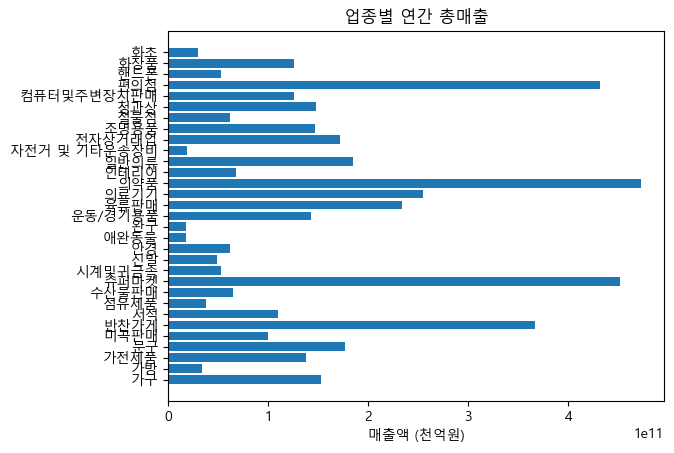

In [31]:
#업종별 총매출 그래프
labels = sale_scale_all['업종']
sale_ = sale_scale_all['총매출']
plt.barh(labels, sale_)
plt.title("업종별 연간 총매출")
plt.xlabel('매출액 (천억원)')
plt.show()

Text(0.5, 0, '매출액 (천억원)')

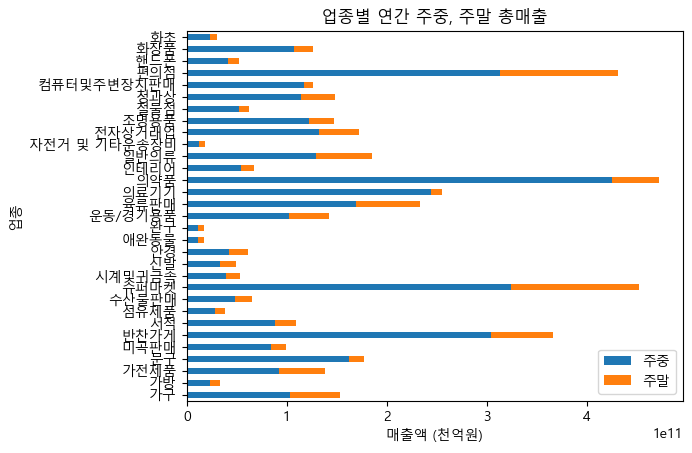

In [32]:
#업종별 주중,주말 그래프
sale_week = sale_scale_all[['업종', '주중', '주말']]

df_1 = sale_week.set_index(keys=['업종'], drop= True)
df_1.plot(kind='barh', stacked=True)
plt.title("업종별 연간 주중, 주말 총매출")
plt.xlabel('매출액 (천억원)')

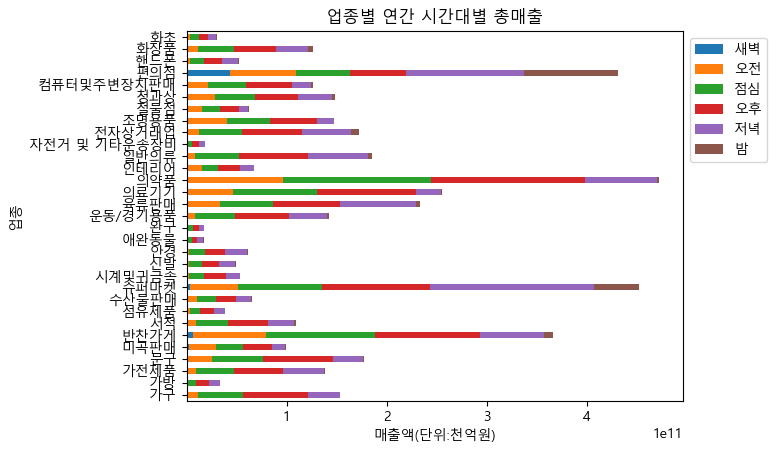

In [33]:
#업종별 시간대 그래프
sale_time = sale_scale_all[['업종','새벽', '오전', '점심', '오후', '저녁','밤']]

df_3 = sale_time.set_index(keys=['업종'], drop= True)
df_3.plot(kind='barh', stacked=True)
plt.title("업종별 연간 시간대별 총매출")
plt.xlabel('매출액(단위:천억원)')
plt.legend(bbox_to_anchor=(1,1))

Text(0.5, 0, '매출액(단위:천억원)')

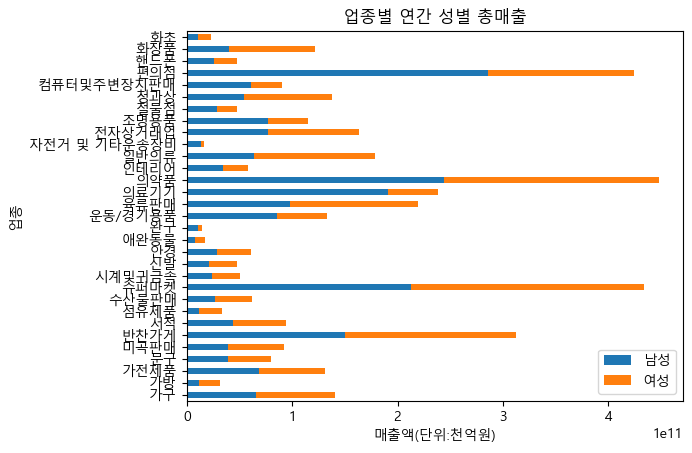

In [34]:
#업종별 성별 그래프
sale_sex = sale_scale_all[['업종','남성', '여성']]

df_4 = sale_sex.set_index(keys=['업종'], drop= True)
df_4.plot(kind='barh', stacked=True)
plt.title("업종별 연간 성별 총매출")
plt.xlabel('매출액(단위:천억원)')

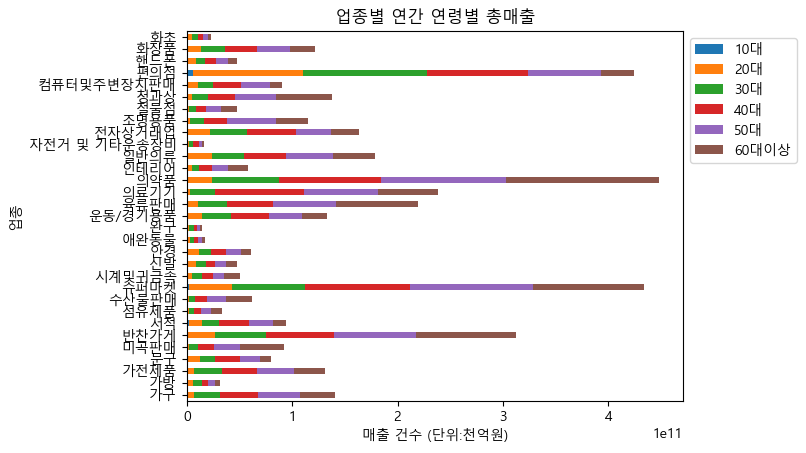

In [35]:
#업종별 연령별 그래프
sale_age = sale_scale_all[['업종', '10대', '20대', '30대',
                        '40대', '50대', '60대이상']]

df_2 = sale_age.set_index(keys=['업종'], drop= True)
df_2.plot(kind='barh', stacked=True)
plt.title("업종별 연간 연령별 총매출")
plt.xlabel('매출 건수 (단위:천억원)')
plt.legend(bbox_to_anchor=(1,1))

In [36]:
# Open API 데이터 가져오기
key = '546f7464586a756e3733666b687678'
url1 = 'http://openapi.seoul.go.kr:8088/{}/xml/TbgisTrdarRelm/1/1000/'.format(key)
url2 = 'http://openapi.seoul.go.kr:8088/{}/xml/TbgisTrdarRelm/1001/1671/'.format(key)

# 1 ~ 1000 행
response1 = requests.get(url1)
content1 = response1.content
dict1 = xmltodict.parse(content1)
jsonString1 = json.dumps(dict1['TbgisTrdarRelm']['row'], ensure_ascii= False)
jsonObj1 = json.loads(jsonString1)

# 1001 ~ 1672 행
response2 = requests.get(url2)
content2 = response2.content
dict2 = xmltodict.parse(content2)
jsonString2 = json.dumps(dict2['TbgisTrdarRelm']['row'], ensure_ascii= False)
jsonObj2 = json.loads(jsonString2)

# for item in jsonObj2:
#     print(item['TRDAR_SE_CD'], item['TRDAR_SE_CD_NM'], item['TRDAR_CD'],
#         item['TRDAR_CD_NM'],item['XCNTS_VALUE'], item['YDNTS_VALUE'],
#         item['SIGNGU_CD'], item['ADSTRD_CD'], item['STDR_YM_CD'])

list_1 = []
list_2 = []
list_3 = []

for item in jsonObj1:
    list_1.append(item['TRDAR_CD'])
    list_2.append(item['XCNTS_VALUE'])
    list_3.append(item['YDNTS_VALUE'])

for item in jsonObj2:
    list_1.append(item['TRDAR_CD'])
    list_2.append(item['XCNTS_VALUE'])
    list_3.append(item['YDNTS_VALUE'])

In [ ]:
!pip install pyproj

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 7.8 MB 4.8 MB/s 


In [37]:
from pyproj import Proj, transform

# Projection 정의
proj_1 = Proj(init='epsg:5181')

# WGS84 경위도: GPS가 사용하는 좌표계 EPSG:4326
proj_2 = Proj(init='epsg:4326')

list_4 = []
list_5 = []

for item in list_2:
    list_4.append(int(item))

for item in list_3:
    list_5.append(int(item))

x_, y_ = transform(proj_1, proj_2, list_4, list_5)

dict_for_dataframe = {'상권_코드':list_1, 'X': x_, 'Y': y_}
coordinate = pd.DataFrame(dict_for_dataframe)
coordinate

C:\Users\82102\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\82102\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\82102\AppData\Local

,상권_코드,X,Y
0,2110753,126.908844,37.448687
1,2110427,127.070978,37.634469
2,2110755,126.912978,37.451006
3,2110739,126.901564,37.441482
4,2111017,127.115614,37.509060
...,...,...,...
1666,1001493,127.011025,37.567312
1667,1001494,126.997374,37.569998
1668,1001495,127.115275,37.516476
1669,1001496,127.060059,37.511003


In [45]:
#상권코드명 기준으로 merge하기 위해 상권코드->상권코드명으로 변환
sale_scale_all.head()
# pro_sale = sale_scale_all[['상권_코드','상권_코드_명']]
# pro_sale['상권_코드'] = pro_sale['상권_코드'].astype('int64')
# coordinate['상권_코드'] = coordinate['상권_코드'].astype('int64')
# new_coord = pd.merge(pro_sale, coordinate, on='상권_코드')
# new_coord.drop(columns=['상권_코드'], inplace=True)
# new_coord.drop_duplicates(['상권_코드_명'], inplace=True)
# new_coord.head()

,업종,상권_코드,총매출,주중,주말,새벽,오전,점심,오후,저녁,밤,남성,여성,10대,20대,30대,40대,50대,60대이상,점포수
0,가구,2212121028,1.531679e+11,1.035534e+11,4.961460e+10,0.000000e+00,1.142976e+10,4.447711e+10,6.510366e+10,3.176973e+10,3.876793e+08,6.597510e+10,7.470828e+10,3.037275e+07,6.379056e+09,2.508364e+10,3.576287e+10,4.013229e+10,3.329437e+10,6675
1,가방,1001331565,3.348827e+10,2.275030e+10,1.073797e+10,2.052129e+07,1.028402e+09,7.860525e+09,1.312089e+10,1.092176e+10,5.361713e+08,1.178499e+10,1.996229e+10,1.879529e+08,5.882775e+09,8.534728e+09,5.295803e+09,6.531087e+09,5.314932e+09,4945
2,가전제품,1377319549,1.380513e+11,9.217895e+10,4.587237e+10,2.003108e+07,9.085181e+09,3.825765e+10,4.878628e+10,4.109164e+10,8.105412e+08,6.819241e+10,6.257286e+10,1.150376e+08,7.108881e+09,2.598691e+10,3.329122e+10,3.523585e+10,2.902738e+10,4903
3,문구,4335964991,1.769241e+11,1.619369e+11,1.498717e+10,2.647300e+07,2.509474e+10,5.139185e+10,6.972432e+10,2.951712e+10,1.169614e+09,3.893215e+10,4.091330e+10,1.570222e+09,1.119313e+10,1.432321e+10,2.329992e+10,1.865135e+10,1.080775e+10,12926
4,미곡판매,2089993619,9.959406e+10,8.441286e+10,1.518120e+10,2.059698e+09,2.754153e+10,2.700925e+10,2.825278e+10,1.369019e+10,1.040605e+09,3.913775e+10,5.322848e+10,3.766265e+07,2.515057e+09,7.757899e+09,1.528487e+10,2.521270e+10,4.155803e+10,3969


In [41]:
# 지역별로 1년 매출
sale_out = sale.drop(columns=['상권_코드','점포수','서비스_업종_코드_명'])
sale_out = sale_out.groupby(['상권_코드_명']).sum()
sale_out.rename(columns={'분기당_매출_금액':'연매출액'}, inplace=True)

correlation = sale_out.drop(columns=['월요일_매출_금액','화요일_매출_금액','수요일_매출_금액','목요일_매출_금액','금요일_매출_금액','토요일_매출_금액','일요일_매출_금액'])
correlation.to_csv('correlation.csv',index=False, encoding='cp949')
final_sale = pd.merge(sale_out, new_coord, on='상권_코드_명')
final_sale

,상권_코드_명,기준_년_코드,기준_분기_코드,분기당_매출_금액,분기당_매출_건수,주중_매출_비율,주말_매출_비율,월요일_매출_비율,화요일_매출_비율,수요일_매출_비율,...,남성_매출_건수,여성_매출_건수,연령대_10_매출_건수,연령대_20_매출_건수,연령대_30_매출_건수,연령대_40_매출_건수,연령대_50_매출_건수,연령대_60_이상_매출_건수,X,Y
0,4.19민주묘지역 2번,56588,70,3.232131e+09,303582,2029,773,355,399,451,...,174286,123559,1485,71904,60762,56934,55322,51441,127.012544,37.649834
1,63빌딩,42441,54,3.688485e+09,577957,1925,176,299,348,305,...,370173,156843,4893,98879,165820,141208,86306,29907,126.939436,37.519778
2,DMC(디지털미디어시티),99029,128,5.161059e+10,5243969,4146,762,782,944,759,...,3049810,1793196,72776,1236935,1511261,1261777,590212,170064,126.889949,37.579506
3,GS강동자이아파트,74777,91,6.712875e+09,514643,2833,871,621,459,760,...,328143,180473,3856,89281,104367,133389,101806,75916,127.147464,37.537920
4,G타워,52546,65,1.033858e+10,1230103,2123,480,483,500,376,...,766652,458750,4451,443635,452731,189255,100352,34976,126.896787,37.480537
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1610,후암시장,99029,128,2.424416e+10,1694860,3727,1183,709,753,588,...,821530,837365,7554,189188,373520,412407,408011,268211,126.976269,37.550281
1611,휘문고교사거리,46483,59,1.056693e+11,328546,2187,113,439,426,530,...,194177,124792,6588,60558,112409,69343,36476,33596,127.064872,37.504261
1612,흑리단길,58609,71,5.253542e+09,626357,2225,676,393,298,604,...,403233,222261,22213,145198,127176,128390,98695,103824,126.965120,37.507220
1613,흑석2치안센터,30315,37,9.046542e+08,16760,1076,427,252,168,311,...,7127,6915,66,972,1640,1852,4789,4726,126.968853,37.505671


In [42]:
# 전체 외식업 TOP10 상권 보기
total20 = final_sale.sort_values('외식업_연매출_금액',ascending=False).reset_index(drop=True).head(10)
total20.to_csv('totalTOP20.csv',index=False, encoding='cp949')

KeyError: '외식업_연매출_금액'

In [ ]:
# 분기별데이터 합치기(세부 외식업 별 한점포당 1년 매출)
d_eatout = food.drop(columns=['상권_코드','점포수'])
detail_eatfood = d_eatout.groupby(['서비스_업종_코드_명','상권_코드_명']).sum().reset_index()
fdetail_eatfood = pd.merge(detail_eatfood, new_coord, on='상권_코드_명')
fdetail_eatfood.rename(columns={'한_점포당_분기별_매출_금액':'외식업_연매출_금액'}, inplace=True)
fdetail_eatfood.head()

,서비스_업종_코드_명,상권_코드_명,외식업_연매출_금액,주중_매출_금액,주말_매출_금액,월요일_매출_금액,화요일_매출_금액,수요일_매출_금액,목요일_매출_금액,금요일_매출_금액,...,남성_매출_금액,여성_매출_금액,연령대_10_매출_금액,연령대_20_매출_금액,연령대_30_매출_금액,연령대_40_매출_금액,연령대_50_매출_금액,연령대_60_이상_매출_금액,X,Y
0,분식전문점,4.19민주묘지역 2번,9.973888e+07,4.904646e+08,4.086928e+08,3.781067e+06,1.154937e+07,1.391045e+07,1.182972e+07,1.203071e+07,...,5.467190e+07,4.116352e+07,4.048259e+05,9.960276e+06,1.469936e+07,2.035607e+07,2.496565e+07,2.544924e+07,127.012544,37.649834
1,일식음식점,4.19민주묘지역 2번,1.864082e+07,4.151452e+07,1.440792e+07,3.266890e+06,3.220828e+06,3.110200e+06,2.605207e+06,1.635050e+06,...,8.754317e+06,9.315053e+06,3.224020e+05,5.607274e+06,3.074372e+06,2.273892e+06,3.182085e+06,3.609344e+06,127.012544,37.649834
2,치킨전문점,4.19민주묘지역 2번,2.595082e+07,1.415085e+08,7.988766e+07,3.048397e+06,3.350680e+06,2.471320e+06,3.481092e+06,4.328515e+06,...,1.496594e+07,9.781558e+06,1.209334e+05,3.182285e+06,4.466957e+06,6.889613e+06,6.306921e+06,3.780783e+06,127.012544,37.649834
3,커피-음료,4.19민주묘지역 2번,7.411106e+07,1.030813e+09,5.203655e+08,9.346153e+06,9.517197e+06,9.329955e+06,1.158418e+07,9.339553e+06,...,3.040680e+07,4.251002e+07,1.379158e+06,1.686984e+07,1.683465e+07,1.708091e+07,1.401697e+07,6.735289e+06,127.012544,37.649834
4,한식음식점,4.19민주묘지역 2번,1.059581e+08,2.359026e+09,1.597712e+09,1.236573e+07,1.286680e+07,1.349198e+07,8.898646e+06,1.552809e+07,...,6.334097e+07,3.747407e+07,1.956777e+05,6.685786e+06,1.252295e+07,1.944555e+07,3.185473e+07,3.011035e+07,127.012544,37.649834


In [ ]:
#편의점, 의약품 업종별 매출액 TOP 20

store = ['편의점','의약품']

detail_result = pd.DataFrame()

for i in store:
  dfTOP20 = fdetail_eatfood[fdetail_eatfood['서비스_업종_코드_명']==i].set_index('서비스_업종_코드_명')
  dfTOP20  = dfTOP20 .sort_values('외식업_연매출_금액', ascending=False).head(20)
  detail_result = detail_result.append(dfTOP20 )

detail_result.head()

,상권_코드_명,외식업_연매출_금액,주중_매출_금액,주말_매출_금액,월요일_매출_금액,화요일_매출_금액,수요일_매출_금액,목요일_매출_금액,금요일_매출_금액,토요일_매출_금액,...,남성_매출_금액,여성_매출_금액,연령대_10_매출_금액,연령대_20_매출_금액,연령대_30_매출_금액,연령대_40_매출_금액,연령대_50_매출_금액,연령대_60_이상_매출_금액,X,Y
서비스_업종_코드_명,,,,,,,,,,,,,,,,,,,,,
한식음식점,테크노상가(엘리시움),1.527457e+09,4.008876e+09,5.734940e+08,2.125973e+08,2.601018e+08,2.647990e+08,2.572741e+08,3.415199e+08,1.911647e+08,...,4.737722e+08,8.046154e+08,2.523363e+05,6.299774e+07,2.392931e+08,3.006494e+08,3.370962e+08,3.380987e+08,127.013142,37.568907
한식음식점,삼성중앙역 5번,1.189374e+09,1.621731e+10,3.523213e+09,1.612868e+08,1.814507e+08,2.094550e+08,2.110530e+08,2.144262e+08,1.216000e+08,...,3.443253e+08,1.434887e+08,2.146609e+05,3.594066e+07,1.383276e+08,1.726184e+08,9.923948e+07,4.147314e+07,127.055842,37.512356
한식음식점,제기동역 1번,6.700736e+08,2.723405e+09,1.460024e+09,8.720673e+07,8.415122e+07,8.800745e+07,8.823625e+07,8.857571e+07,1.139820e+08,...,3.422603e+08,2.650027e+08,5.039995e+05,2.321751e+07,5.707738e+07,1.007949e+08,1.470726e+08,2.785967e+08,127.033374,37.579787
한식음식점,잠원역,6.079325e+08,1.218359e+09,6.054381e+08,7.515913e+07,9.384941e+07,7.325202e+07,7.583947e+07,8.801973e+07,1.070244e+08,...,3.221749e+08,1.449984e+08,1.652415e+06,3.508212e+07,7.519174e+07,1.439228e+08,1.172943e+08,9.402987e+07,127.011390,37.512766
한식음식점,봉원사,5.985700e+08,3.172558e+09,2.410409e+08,1.600164e+08,6.514649e+07,9.954917e+07,7.879544e+07,1.550691e+08,3.015904e+07,...,3.467488e+07,5.973471e+07,8.662213e+05,1.992764e+07,1.524963e+07,1.599987e+07,2.656134e+07,1.580489e+07,126.946686,37.568508


In [ ]:
#세부 음식점(10개) 시각화 데이터파일 저장
Koreanfood = detail_result[detail_result.index=='한식음식점']
Koreanfood.to_csv('Koreanfood.csv',index=False, encoding='cp949')

Chinesefood = detail_result[detail_result.index=='중식음식점']
Chinesefood.to_csv('Chinesefood.csv',index=False, encoding='cp949')

Japanesefood = detail_result[detail_result.index=='일식음식점']
Japanesefood.to_csv('Japanesefood.csv',index=False, encoding='cp949')

Westernfood = detail_result[detail_result.index=='양식음식점']
Westernfood.to_csv('Westernfood.csv',index=False, encoding='cp949')

Bakery = detail_result[detail_result.index=='제과점']
Bakery.to_csv('Bakery.csv',index=False, encoding='cp949')

Fast_food = detail_result[detail_result.index=='패스트푸드점']
Fast_food.to_csv('Fast_food.csv',index=False, encoding='cp949')

Chicken = detail_result[detail_result.index=='치킨전문점']
Chicken.to_csv('Chicken.csv',index=False, encoding='cp949')

Snackbar = detail_result[detail_result.index=='분식전문점']
Snackbar.to_csv('Snackbar.csv',index=False, encoding='cp949')

Pub = detail_result[detail_result.index=='호프-간이주점']
Pub.to_csv('Pub.csv',index=False, encoding='cp949')

Cafe = detail_result[detail_result.index=='커피-음료']
Cafe.to_csv('Cafe.csv',index=False, encoding='cp949')

In [ ]:
import folium
import math
import base64
from folium import IFrame

In [ ]:
# 세부 업종별 Top 10 상권 전체 매출 지도 내 시각화
count = 0

category = {'한식당':Koreanfood, '중식당':Chinesefood, '일식점':Japanesefood,
            '양식점':Westernfood, '제과점':Bakery, '패스트푸드점':Fast_food,
            '치킨집':Chicken, '분식집':Snackbar, '술집':Pub, '카페':Cafe}

for index_category, (key, upjong) in enumerate(category.items()):
  print(key)
  seoul_map = folium.Map(location=[37.55,126.98], zoom_start=12, scrollWheelZoom=False)
  for name, lat, lng, pop, yoil_1, yoil_2, yoil_3, yoil_4, yoil_5, yoil_6, yoil_7, t1, t2, t3, t4, t5, t6, M, F, age_10, age_20, age_30, age_40, age_50, age_60 in zip(upjong.상권_코드_명,
                                  upjong.Y,
                                  upjong.X,
                                  upjong.외식업_연매출_금액,
                                  upjong.월요일_매출_금액,
                                  upjong.화요일_매출_금액,
                                  upjong.수요일_매출_금액,
                                  upjong.목요일_매출_금액,
                                  upjong.금요일_매출_금액,
                                  upjong.토요일_매출_금액,
                                  upjong.일요일_매출_금액,
                                  upjong['시간대_00~06_매출_금액'],
                                  upjong['시간대_06~11_매출_금액'],
                                  upjong['시간대_11~14_매출_금액'],
                                  upjong['시간대_14~17_매출_금액'],
                                  upjong['시간대_17~21_매출_금액'],
                                  upjong['시간대_21~24_매출_금액'],
                                  upjong.남성_매출_금액,
                                  upjong.여성_매출_금액,
                                  upjong.연령대_10_매출_금액,
                                  upjong.연령대_20_매출_금액,
                                  upjong.연령대_30_매출_금액,
                                  upjong.연령대_40_매출_금액,
                                  upjong.연령대_50_매출_금액,
                                  upjong.연령대_60_이상_매출_금액):

      labels_1 = ['월요일', '화요일', '수요일', '목요일', '금요일', '토요일', '일요일']
      size_1 = [yoil_1, yoil_2, yoil_3, yoil_4, yoil_5, yoil_6, yoil_7]
      
      labels_2 = ['새벽', '오전', '점심', '오후', '저녁', '밤']
      size_2 = [t1, t2, t3, t4, t5, t6]

      labels_3 = ['남성', '여성']
      size_3 = [M, F]

      labels_4 = ['10대', '20대', '30대', '40대', '50대', '60대 이상']
      size_4 = [age_10, age_20, age_30, age_40, age_50, age_60]

      # print(labels_1[size_1.index(max(size_1))])
      hashtag = ['#{} '.format(labels_1[size_1.index(max(size_1))]),
              '#{} '.format(labels_2[size_2.index(max(size_2))]),
              '#{} '.format(labels_3[size_3.index(max(size_3))]),
              '#{} '.format(labels_4[size_4.index(max(size_4))])]
      
      wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 1}

      fig = plt.figure(figsize=(10,6))
      fig.suptitle('{} {} 주요 고객: {}'.format(name, key, [*hashtag]),fontweight ="bold", fontsize=18,)

      fig1 = plt.subplot(221)
      plt.title('요일별 예상 매출 분포'.format(name))
      plt.pie(size_1,labels=labels_1, wedgeprops = wedgeprops,
          autopct='%1.1f%%',shadow=True,startangle=90)

      fig2 = plt.subplot(222)
      plt.title('시간별 예상 매출 분포')
      plt.pie(size_2,labels=labels_2, wedgeprops = wedgeprops,
          autopct='%1.1f%%',shadow=True,startangle=90)

      fig3 = plt.subplot(223)
      plt.title('성별 예상 매출 분포')
      plt.pie(size_3,labels=labels_3, wedgeprops = wedgeprops,
          autopct='%1.1f%%',shadow=True,startangle=90)

      fig4 = plt.subplot(224)
      plt.title('연령별 예상 매출 분포')
      plt.pie(size_4,labels=labels_4, wedgeprops = wedgeprops,
          autopct='%1.1f%%',shadow=True,startangle=90)

      plt.savefig('./sample_data/chart{}.jpg'.format(count))
      plt.close(fig)

      encoded = base64.b64encode(open('./sample_data/chart{}.jpg'.format(count), 'rb').read())
      html = '<img src="data:image/png;base64,{}">'.format
      iframe = IFrame(html(encoded.decode('UTF-8')), width=800, height=450)

      popup = folium.Popup(iframe, max_width=800)

      folium.CircleMarker(
          [lat, lng],
          radius= math.sqrt(pop//500000),
          color= 'black',
          fill_color='#ff000099',
          tooltip= '{} 상세정보'.format(name),
          popup = popup).add_to(seoul_map)
      count += 1

  display(seoul_map)
  seoul_map.save('seoul_{}_map.html'.format(key))

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
#세부 외식(10개업종)별 dataFrame 다시 만들기 (Top10 아님)

store = ['한식음식점','중식음식점','일식음식점','양식음식점','제과점','패스트푸드점','치킨전문점','분식전문점','호프-간이주점','커피-음료']

total_detail= pd.DataFrame()

for i in store:
  dfTotal = fdetail_eatfood[fdetail_eatfood['서비스_업종_코드_명']==i].set_index('서비스_업종_코드_명')
  dfTotal = dfTotal.sort_values('외식업_연매출_금액', ascending=False)
  total_detail = total_detail.append(dfTotal)

total_detail.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9463 entries, 한식음식점 to 커피-음료
Data columns (total 27 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   상권_코드_명          9463 non-null   object 
 1   외식업_연매출_금액       9463 non-null   float64
 2   주중_매출_금액         9463 non-null   float64
 3   주말_매출_금액         9463 non-null   float64
 4   월요일_매출_금액        9463 non-null   float64
 5   화요일_매출_금액        9463 non-null   float64
 6   수요일_매출_금액        9463 non-null   float64
 7   목요일_매출_금액        9463 non-null   float64
 8   금요일_매출_금액        9463 non-null   float64
 9   토요일_매출_금액        9463 non-null   float64
 10  일요일_매출_금액        9463 non-null   float64
 11  시간대_00~06_매출_금액  9463 non-null   float64
 12  시간대_06~11_매출_금액  9463 non-null   float64
 13  시간대_11~14_매출_금액  9463 non-null   float64
 14  시간대_14~17_매출_금액  9463 non-null   float64
 15  시간대_17~21_매출_금액  9463 non-null   float64
 16  시간대_21~24_매출_금액  9463 non-null   float64
 17  남성_매출_금액      

In [ ]:
#세부 음식점(10개) TOP10 아님
tKoreanfood = total_detail[total_detail.index=='한식음식점']
tChinesefood = total_detail[total_detail.index=='중식음식점']
tJapanesefood = total_detail[total_detail.index=='일식음식점']
tWesternfood = total_detail[total_detail.index=='양식음식점']
tBakery = total_detail[total_detail.index=='제과점']
tFast_food = total_detail[total_detail.index=='패스트푸드점']
tChicken = total_detail[total_detail.index=='치킨전문점']
tSnackbar = total_detail[total_detail.index=='분식전문점']
tPub = total_detail[total_detail.index=='호프-간이주점']
tCafe = total_detail[total_detail.index=='커피-음료']

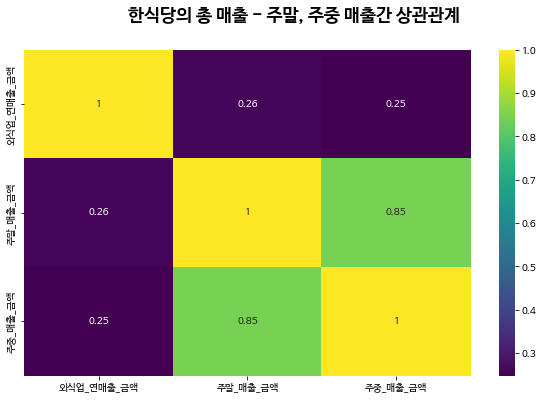

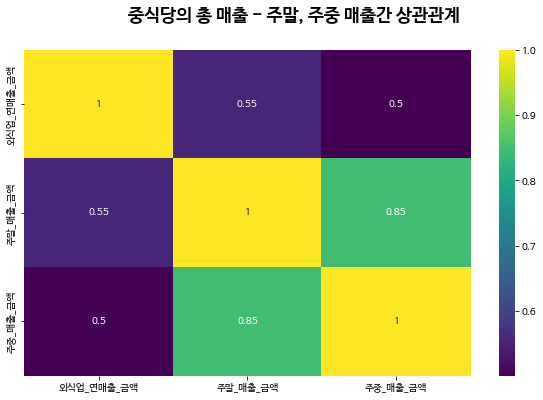

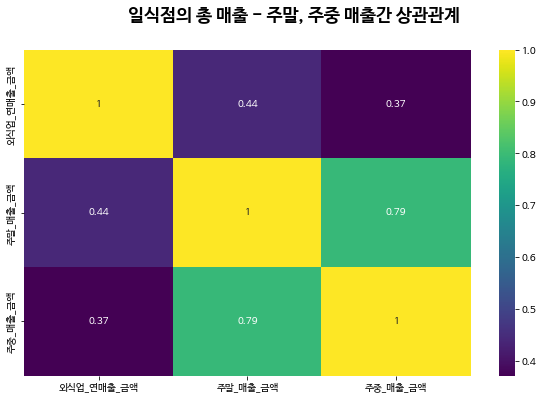

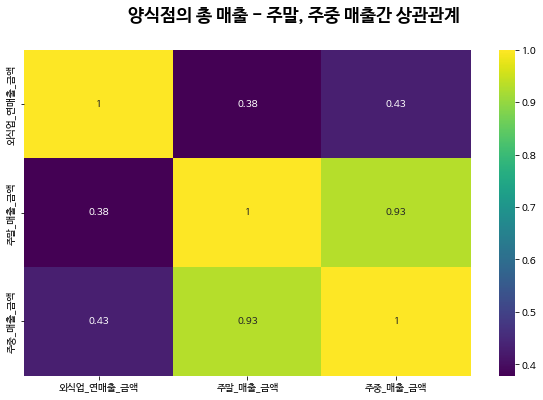

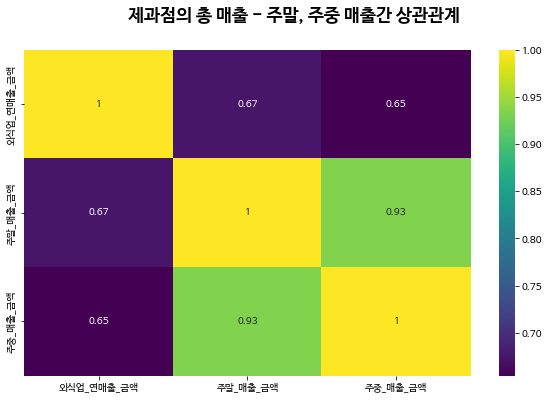

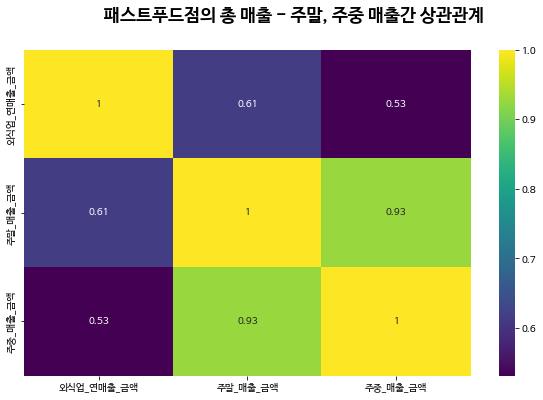

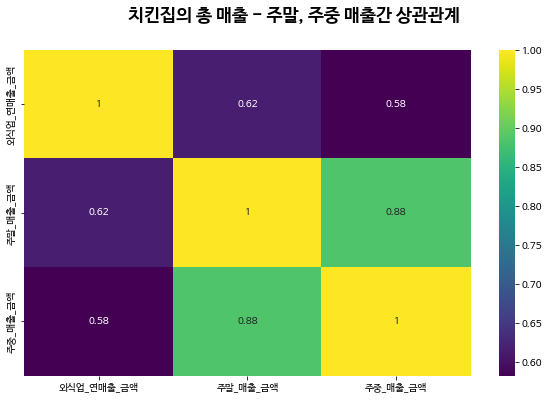

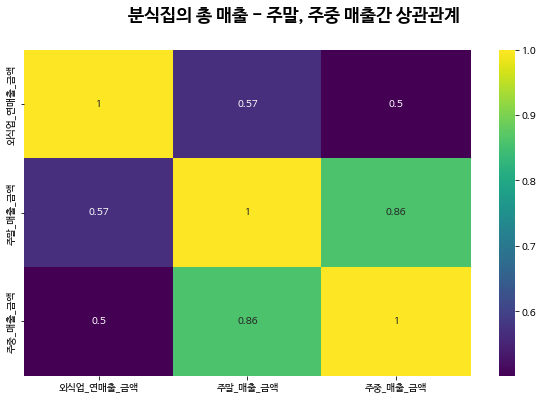

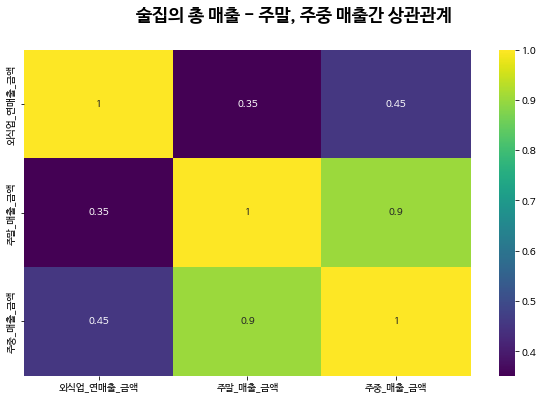

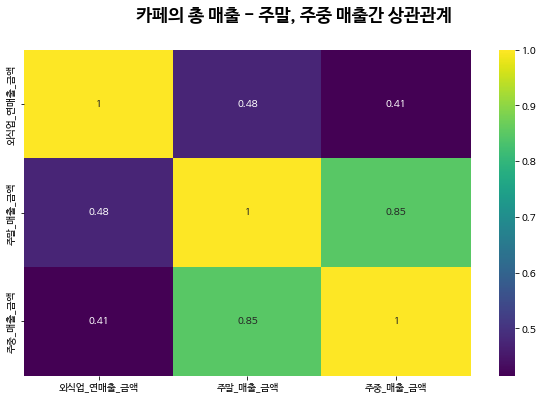

In [ ]:
import seaborn as sns

# 총매출 - 주말, 주중별 매출 간 상관관계

category = {'한식당':tKoreanfood, '중식당':tChinesefood, '일식점':tJapanesefood,
            '양식점':tWesternfood, '제과점':tBakery, '패스트푸드점':tFast_food,
            '치킨집':tChicken, '분식집':tSnackbar, '술집':tPub, '카페':tCafe}

for index_category, (key, upjong) in enumerate(category.items()):
    fig = plt.figure(figsize=(10,6))
    fig.suptitle('{}의 총 매출 - 주말, 주중 매출간 상관관계'.format(key),fontweight ="bold", fontsize=18,)
    yoil_heatmap = sns.heatmap(upjong[['외식업_연매출_금액', '주말_매출_금액', '주중_매출_금액']].corr(), annot=True, cmap='viridis')
    # plt.close(fig)

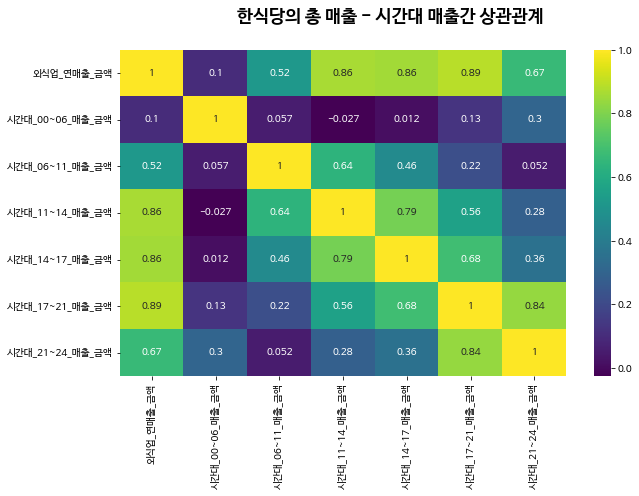

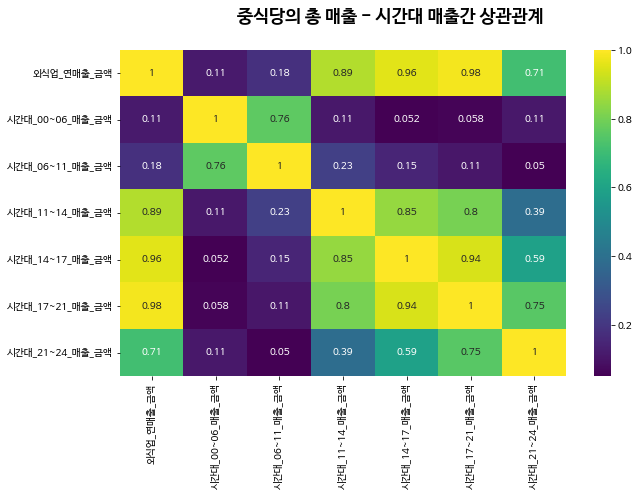

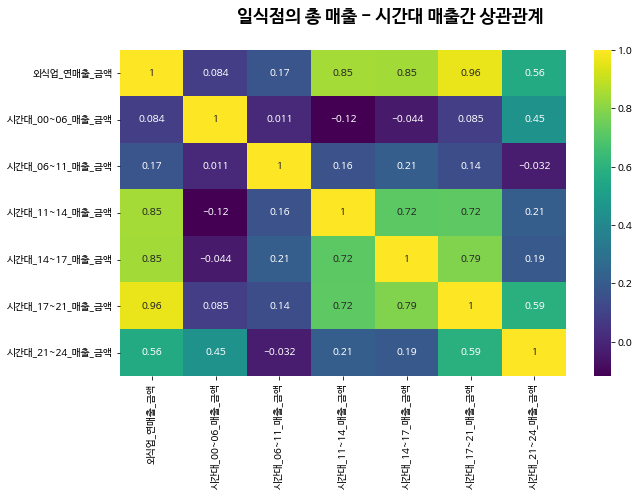

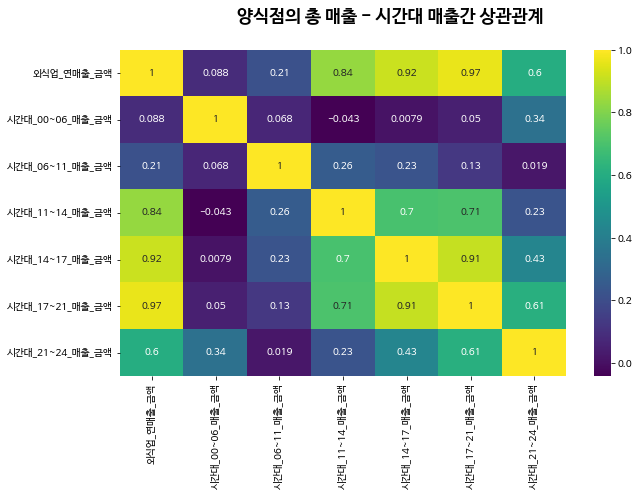

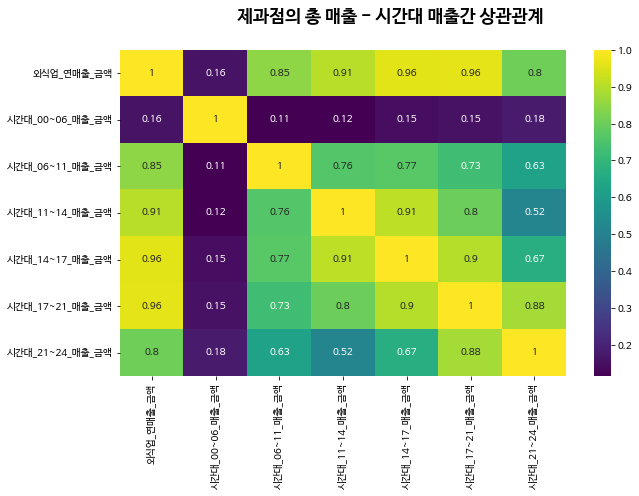

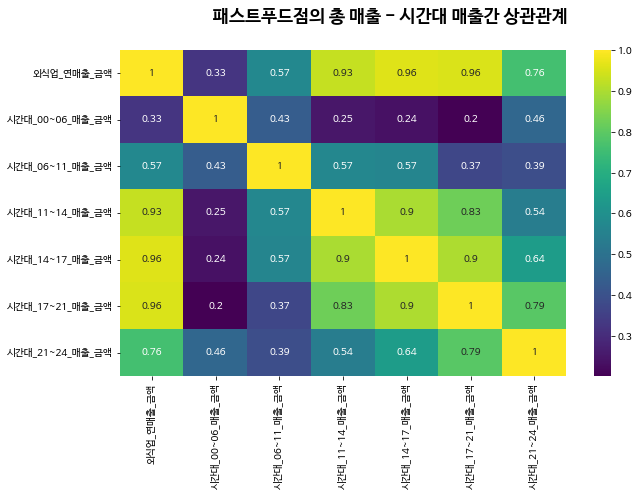

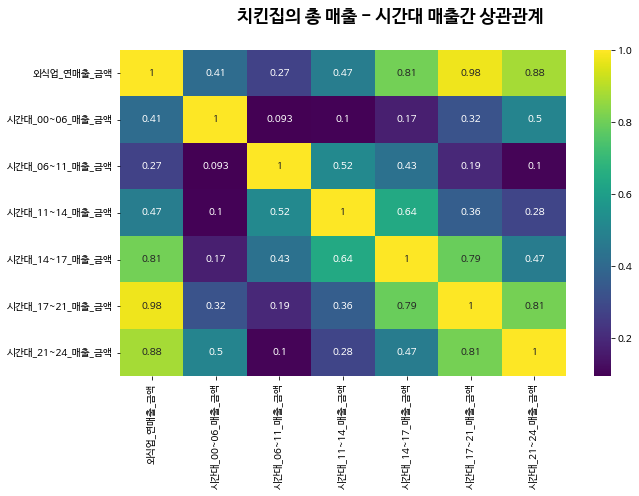

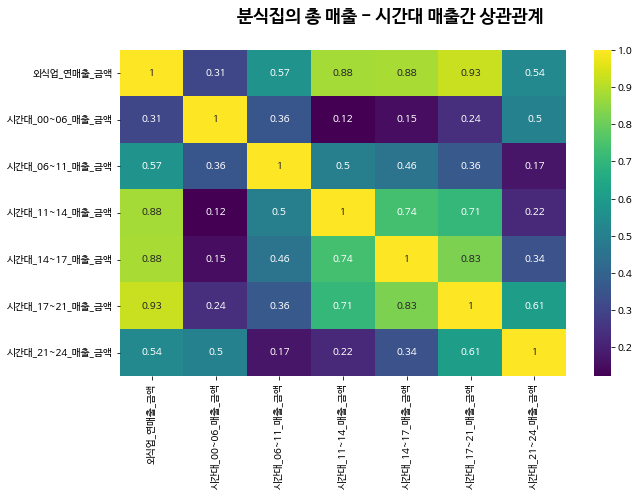

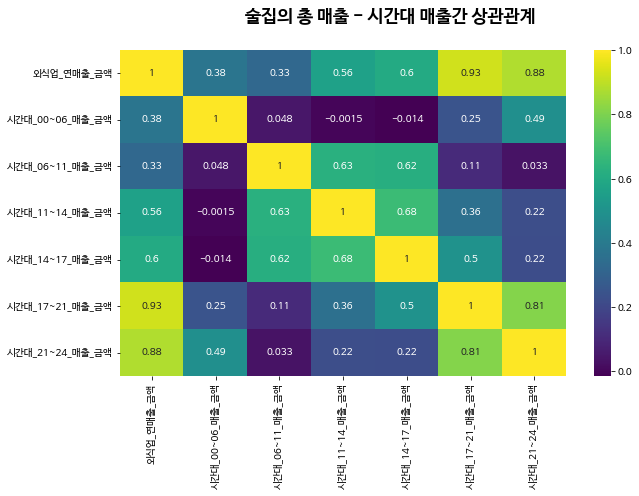

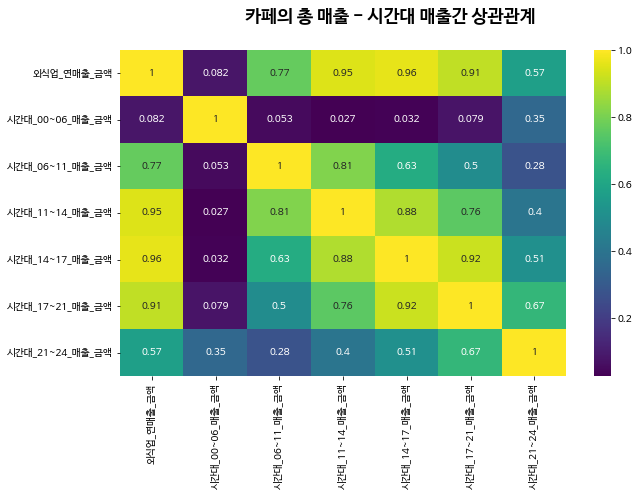

In [ ]:
# 총매출 - 시간대별 매출 간 상관관계

for index_category, (key, upjong) in enumerate(category.items()):
    fig = plt.figure(figsize=(10,6))
    fig.suptitle('{}의 총 매출 - 시간대 매출간 상관관계'.format(key),fontweight ="bold", fontsize=18,)
    yoil_heatmap = sns.heatmap(upjong[['외식업_연매출_금액', '시간대_00~06_매출_금액', '시간대_06~11_매출_금액', '시간대_11~14_매출_금액',
                        '시간대_14~17_매출_금액', '시간대_17~21_매출_금액', '시간대_21~24_매출_금액']].corr(), annot=True, cmap='viridis')

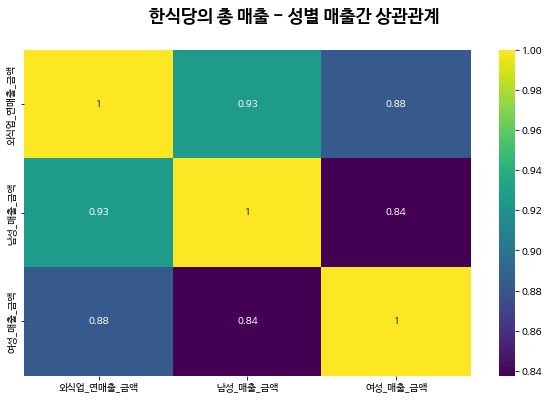

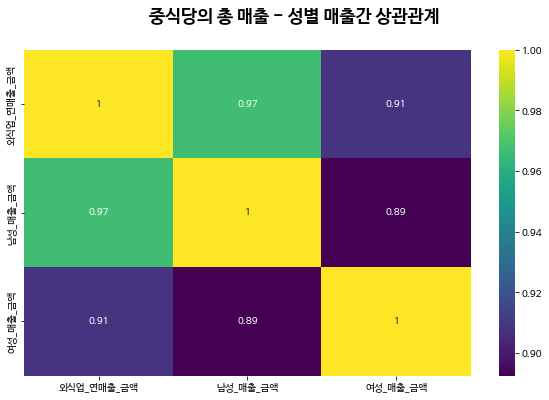

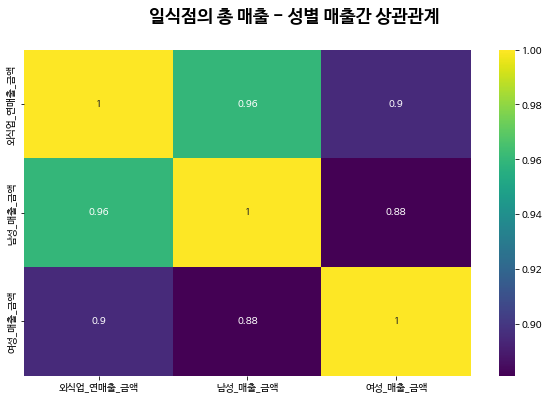

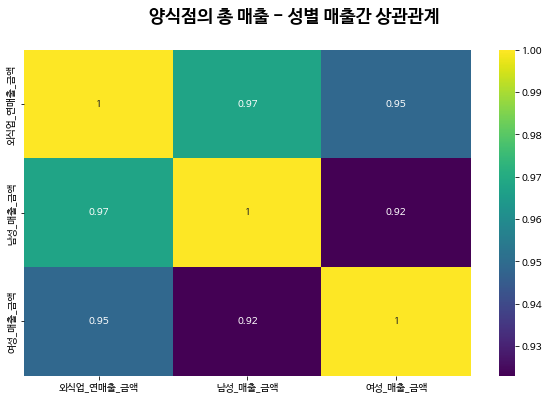

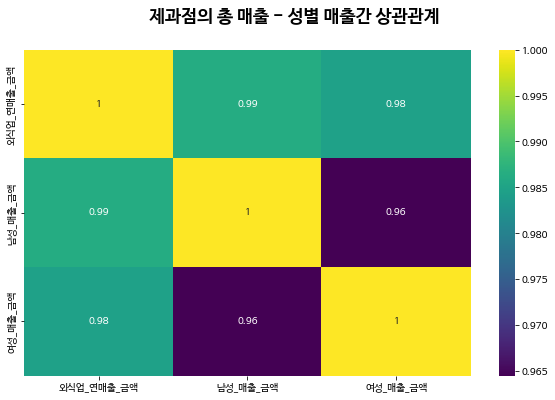

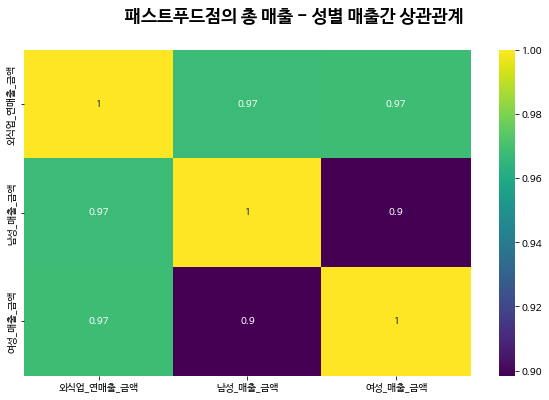

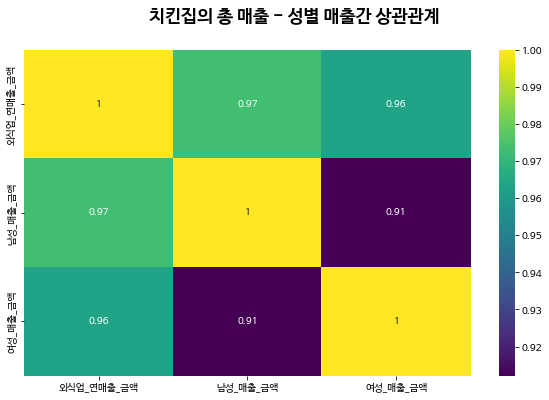

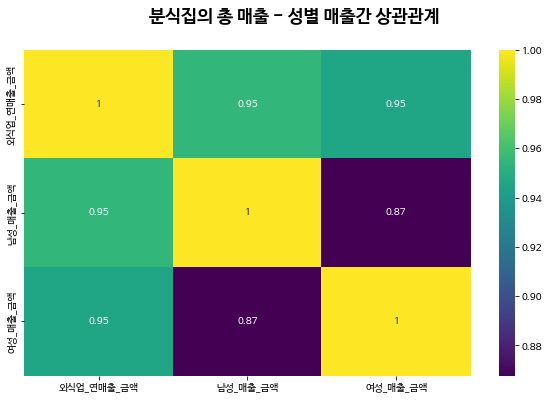

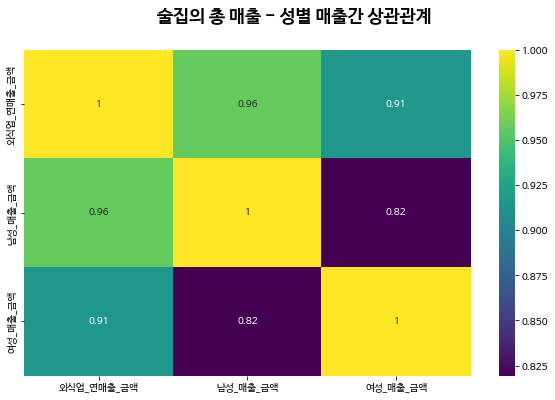

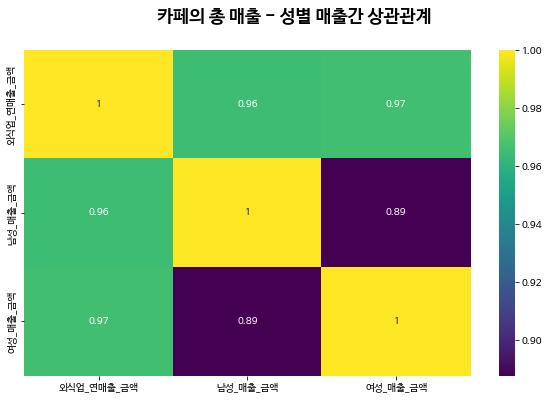

In [ ]:
# 총매출 - 성별 매출 간 상관관계

for index_category, (key, upjong) in enumerate(category.items()):
    fig = plt.figure(figsize=(10,6))
    fig.suptitle('{}의 총 매출 - 성별 매출간 상관관계'.format(key),fontweight ="bold", fontsize=18,)
    yoil_heatmap = sns.heatmap(upjong[['외식업_연매출_금액', '남성_매출_금액', '여성_매출_금액']].corr(), annot=True, cmap='viridis')

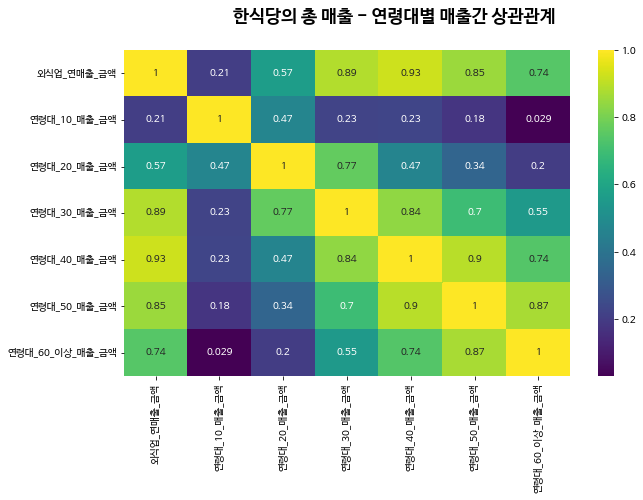

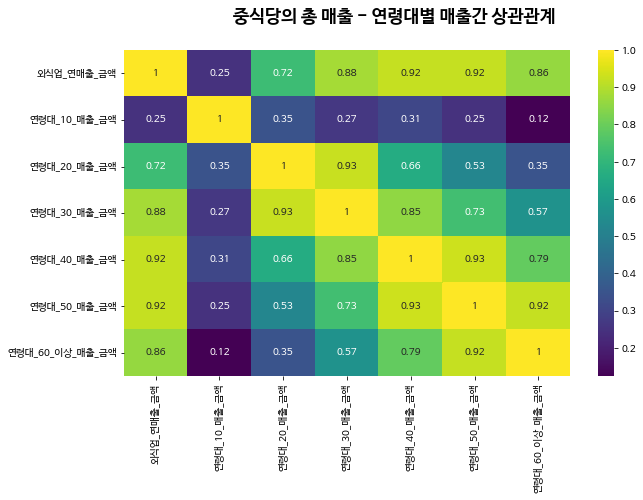

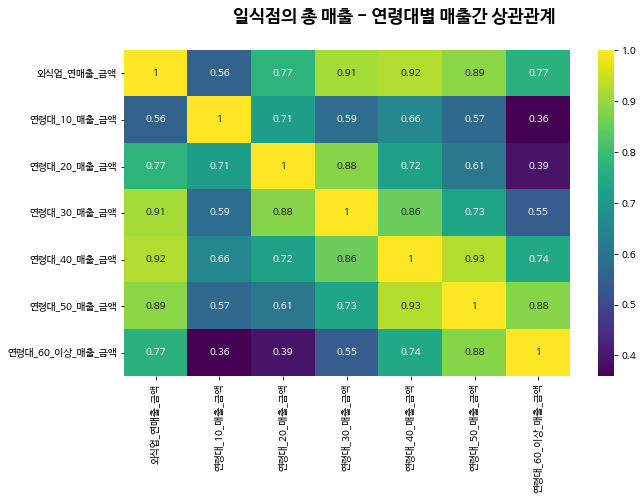

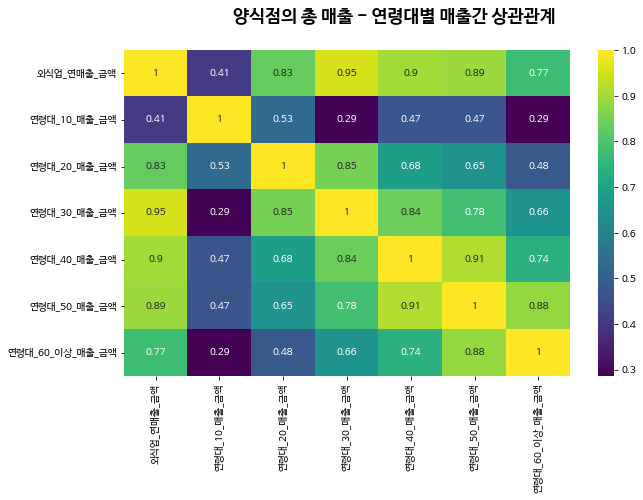

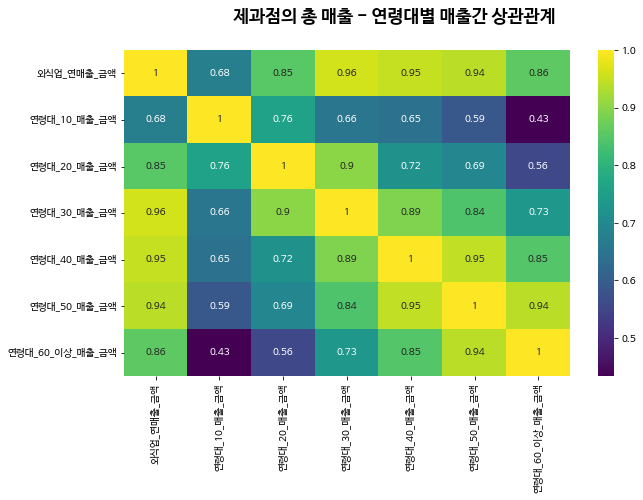

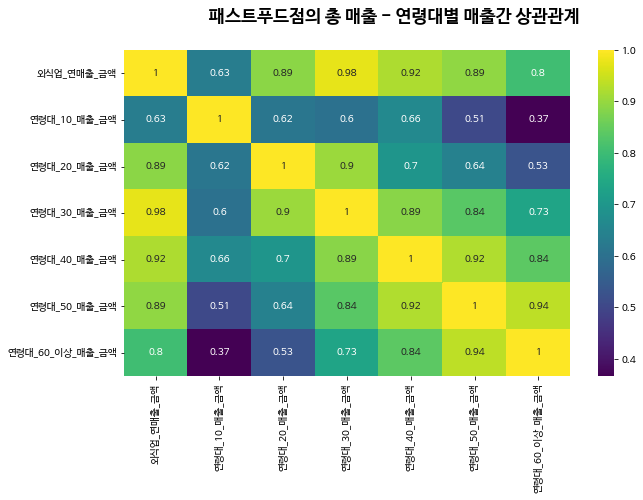

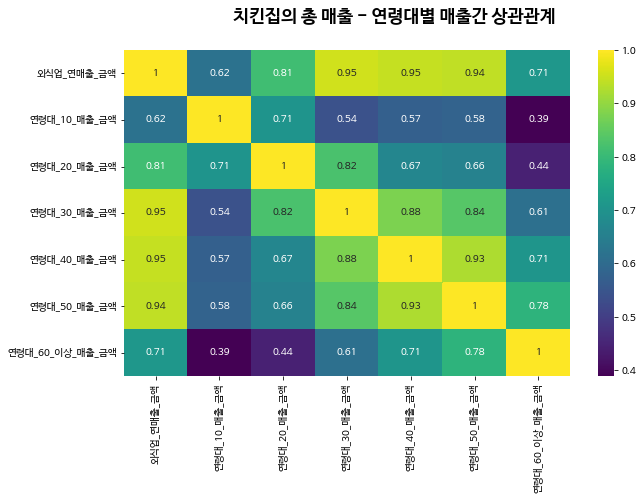

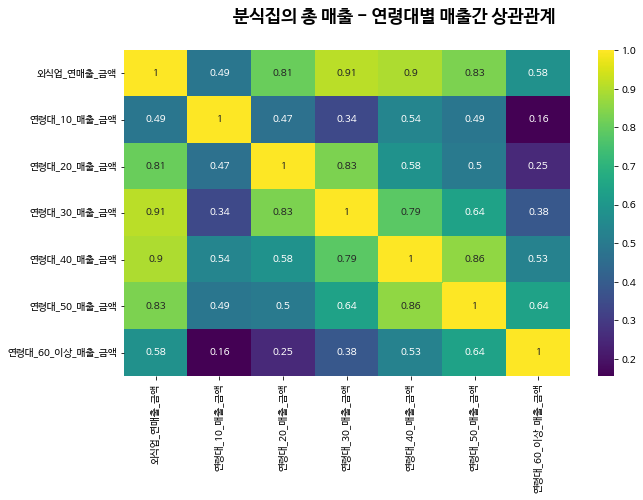

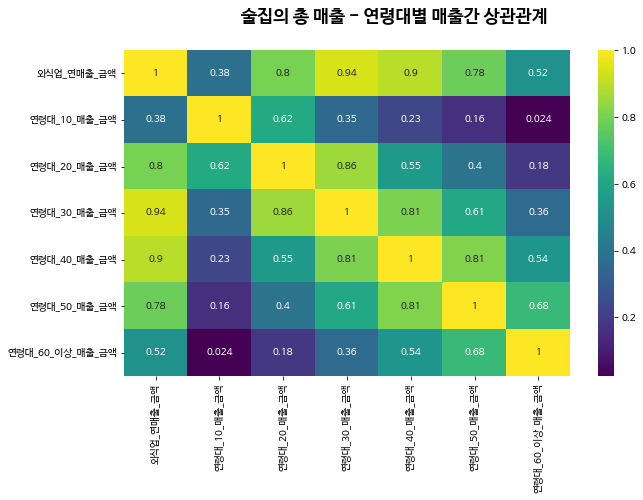

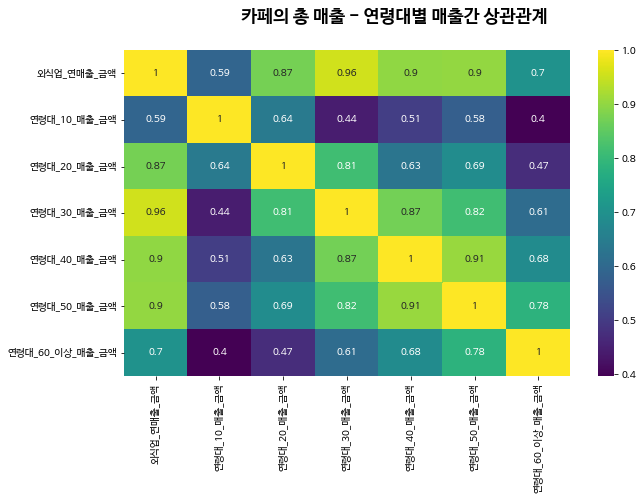

In [ ]:
# 총매출 - 연령별 매출 간 상관관계

for index_category, (key, upjong) in enumerate(category.items()):
    fig = plt.figure(figsize=(10,6))
    fig.suptitle('{}의 총 매출 - 연령대별 매출간 상관관계'.format(key),fontweight ="bold", fontsize=18,)
    yoil_heatmap = sns.heatmap(upjong[['외식업_연매출_금액', '연령대_10_매출_금액', '연령대_20_매출_금액',
                            '연령대_30_매출_금액', '연령대_40_매출_금액', '연령대_50_매출_금액', '연령대_60_이상_매출_금액']].corr(), annot=True, cmap='viridis')

## <머신러닝>

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49345 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44428 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48516 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53076 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46300 missing from current font.
  font.set_

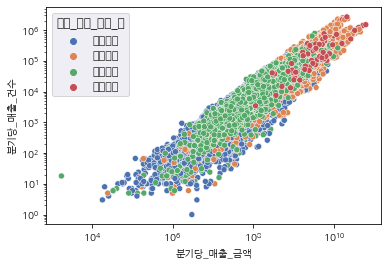

In [ ]:
import seaborn as sns

propor = df[df['분류']=='외식업']
propor = propor[['상권_구분_코드_명','분기당_매출_금액','분기당_매출_건수']]
plt.rcParams['font.family'] = 'NanumGothic'
fig1, ax1 = plt.subplots()
plt.xscale('log')
plt.yscale('log')
plt.rcParams['font.family'] = 'Malgun Gothic'
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.scatterplot(ax=ax1, data=propor,
                x='분기당_매출_금액', y='분기당_매출_건수', hue='상권_구분_코드_명')

In [ ]:
#필요한 열만 가져오기
food2 = df[df['분류']=='외식업']

food2 = food2[['상권_구분_코드_명', '상권_코드_명', '서비스_업종_코드_명', '주중_매출_건수', '주말_매출_건수',
             '시간대_건수~06_매출_건수', '시간대_건수~11_매출_건수', '시간대_건수~14_매출_건수', '시간대_건수~17_매출_건수', '시간대_건수~21_매출_건수', '시간대_건수~24_매출_건수',
             '남성_매출_건수', '여성_매출_건수',
             '연령대_10_매출_건수', '연령대_20_매출_건수', '연령대_30_매출_건수', '연령대_40_매출_건수','연령대_50_매출_건수', '연령대_60_이상_매출_건수' ]]
food2.head(1)

,상권_구분_코드_명,상권_코드_명,서비스_업종_코드_명,주중_매출_건수,주말_매출_건수,시간대_건수~06_매출_건수,시간대_건수~11_매출_건수,시간대_건수~14_매출_건수,시간대_건수~17_매출_건수,시간대_건수~21_매출_건수,시간대_건수~24_매출_건수,남성_매출_건수,여성_매출_건수,연령대_10_매출_건수,연령대_20_매출_건수,연령대_30_매출_건수,연령대_40_매출_건수,연령대_50_매출_건수,연령대_60_이상_매출_건수
0,골목상권,이북5도청사,한식음식점,16355,9147,0,2988,10420,4978,6959,157,15667,7253,108,1098,2013,4344,7792,7568


In [ ]:
#분기당 합쳐서 1년 건수
year_number = food2.groupby(['상권_구분_코드_명','상권_코드_명','서비스_업종_코드_명']).sum().reset_index()
year_number

,상권_구분_코드_명,상권_코드_명,서비스_업종_코드_명,주중_매출_건수,주말_매출_건수,시간대_건수~06_매출_건수,시간대_건수~11_매출_건수,시간대_건수~14_매출_건수,시간대_건수~17_매출_건수,시간대_건수~21_매출_건수,시간대_건수~24_매출_건수,남성_매출_건수,여성_매출_건수,연령대_10_매출_건수,연령대_20_매출_건수,연령대_30_매출_건수,연령대_40_매출_건수,연령대_50_매출_건수,연령대_60_이상_매출_건수
0,골목상권,4.19민주묘지역 2번,분식전문점,37218,23573,0,2208,22352,14506,20660,1065,31217,28232,351,8893,9586,13278,14273,13069
1,골목상권,4.19민주묘지역 2번,일식음식점,3549,834,0,6,2394,664,1296,23,1854,2473,114,1670,739,523,729,551
2,골목상권,4.19민주묘지역 2번,치킨전문점,5843,3380,14,0,416,911,5443,2439,5342,3708,65,1324,1740,2490,2098,1329
3,골목상권,4.19민주묘지역 2번,커피-음료,119165,63142,66,23705,44283,57284,47722,9247,70295,110366,5100,52884,36103,37353,33791,15428
4,골목상권,4.19민주묘지역 2번,한식음식점,72795,42203,18,4066,37327,23062,45191,5334,70682,41366,328,8893,13351,20668,34068,34737
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9458,전통시장,후암시장,커피-음료,9812,1497,0,404,8522,1509,860,14,4642,3075,0,1289,2399,1829,1385,818
9459,전통시장,후암시장,한식음식점,57868,13958,520,1197,26472,6734,30575,6328,37217,19315,733,8403,14967,12844,13626,5958
9460,전통시장,후암시장,호프-간이주점,203,86,6,0,0,0,84,199,74,160,0,10,27,22,154,20
9461,전통시장,흑석시장,양식음식점,17593,6470,0,853,11421,7290,4499,0,13643,9907,112,3783,4887,5036,6264,3465


In [ ]:
#열이름 바꾸기
year_number.columns = ['상권', '지역', '업종', '주중', '주말', '0시~6시', '6시~11시', '11시~14시', '14시~17시', '17시~21시','21시~24시', '남성', '여성', '10대', '20대', '30대', '40대','50대','60대이상']
year_number

,상권,지역,업종,주중,주말,0시~6시,6시~11시,11시~14시,14시~17시,17시~21시,21시~24시,남성,여성,10대,20대,30대,40대,50대,60대이상
0,골목상권,4.19민주묘지역 2번,분식전문점,37218,23573,0,2208,22352,14506,20660,1065,31217,28232,351,8893,9586,13278,14273,13069
1,골목상권,4.19민주묘지역 2번,일식음식점,3549,834,0,6,2394,664,1296,23,1854,2473,114,1670,739,523,729,551
2,골목상권,4.19민주묘지역 2번,치킨전문점,5843,3380,14,0,416,911,5443,2439,5342,3708,65,1324,1740,2490,2098,1329
3,골목상권,4.19민주묘지역 2번,커피-음료,119165,63142,66,23705,44283,57284,47722,9247,70295,110366,5100,52884,36103,37353,33791,15428
4,골목상권,4.19민주묘지역 2번,한식음식점,72795,42203,18,4066,37327,23062,45191,5334,70682,41366,328,8893,13351,20668,34068,34737
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9458,전통시장,후암시장,커피-음료,9812,1497,0,404,8522,1509,860,14,4642,3075,0,1289,2399,1829,1385,818
9459,전통시장,후암시장,한식음식점,57868,13958,520,1197,26472,6734,30575,6328,37217,19315,733,8403,14967,12844,13626,5958
9460,전통시장,후암시장,호프-간이주점,203,86,6,0,0,0,84,199,74,160,0,10,27,22,154,20
9461,전통시장,흑석시장,양식음식점,17593,6470,0,853,11421,7290,4499,0,13643,9907,112,3783,4887,5036,6264,3465


In [ ]:
# 주중/5, 주말/2
year_number['주중'] = year_number['주중']/5
year_number['주말'] = year_number['주말']/2
year_number= year_number.drop(columns = ['업종','지역'])
year_number

,상권,주중,주말,0시~6시,6시~11시,11시~14시,14시~17시,17시~21시,21시~24시,남성,여성,10대,20대,30대,40대,50대,60대이상
0,골목상권,7443.6,11786.5,0,2208,22352,14506,20660,1065,31217,28232,351,8893,9586,13278,14273,13069
1,골목상권,709.8,417.0,0,6,2394,664,1296,23,1854,2473,114,1670,739,523,729,551
2,골목상권,1168.6,1690.0,14,0,416,911,5443,2439,5342,3708,65,1324,1740,2490,2098,1329
3,골목상권,23833.0,31571.0,66,23705,44283,57284,47722,9247,70295,110366,5100,52884,36103,37353,33791,15428
4,골목상권,14559.0,21101.5,18,4066,37327,23062,45191,5334,70682,41366,328,8893,13351,20668,34068,34737
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9458,전통시장,1962.4,748.5,0,404,8522,1509,860,14,4642,3075,0,1289,2399,1829,1385,818
9459,전통시장,11573.6,6979.0,520,1197,26472,6734,30575,6328,37217,19315,733,8403,14967,12844,13626,5958
9460,전통시장,40.6,43.0,6,0,0,0,84,199,74,160,0,10,27,22,154,20
9461,전통시장,3518.6,3235.0,0,853,11421,7290,4499,0,13643,9907,112,3783,4887,5036,6264,3465


In [ ]:
#시간대로 나눠주기
year_number['0시~6시'] = year_number['0시~6시']/6
year_number['6시~11시'] = year_number['6시~11시']/5
year_number['11시~14시'] = year_number['11시~14시']/3
year_number['14시~17시'] = year_number['14시~17시']/3
year_number['17시~21시'] = year_number['17시~21시']/4
year_number['21시~24시'] = year_number['21시~24시']/3
year_number

,상권,주중,주말,0시~6시,6시~11시,11시~14시,14시~17시,17시~21시,21시~24시,남성,여성,10대,20대,30대,40대,50대,60대이상
0,골목상권,7443.6,11786.5,0.000000,441.6,7450.666667,4835.333333,5165.00,355.000000,31217,28232,351,8893,9586,13278,14273,13069
1,골목상권,709.8,417.0,0.000000,1.2,798.000000,221.333333,324.00,7.666667,1854,2473,114,1670,739,523,729,551
2,골목상권,1168.6,1690.0,2.333333,0.0,138.666667,303.666667,1360.75,813.000000,5342,3708,65,1324,1740,2490,2098,1329
3,골목상권,23833.0,31571.0,11.000000,4741.0,14761.000000,19094.666667,11930.50,3082.333333,70295,110366,5100,52884,36103,37353,33791,15428
4,골목상권,14559.0,21101.5,3.000000,813.2,12442.333333,7687.333333,11297.75,1778.000000,70682,41366,328,8893,13351,20668,34068,34737
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9458,전통시장,1962.4,748.5,0.000000,80.8,2840.666667,503.000000,215.00,4.666667,4642,3075,0,1289,2399,1829,1385,818
9459,전통시장,11573.6,6979.0,86.666667,239.4,8824.000000,2244.666667,7643.75,2109.333333,37217,19315,733,8403,14967,12844,13626,5958
9460,전통시장,40.6,43.0,1.000000,0.0,0.000000,0.000000,21.00,66.333333,74,160,0,10,27,22,154,20
9461,전통시장,3518.6,3235.0,0.000000,170.6,3807.000000,2430.000000,1124.75,0.000000,13643,9907,112,3783,4887,5036,6264,3465


In [ ]:
#범주형 데이터로 변환
year_number.loc[year_number['주중']>year_number['주말'], '요일'] = '주중'
year_number.loc[year_number['주말']>year_number['주중'], '요일'] = '주말'
year_number.loc[year_number['남성']>year_number['여성'], '성별'] = '남성'
year_number.loc[year_number['여성']>year_number['남성'], '성별'] = '여성'
year_number = year_number.drop(columns=['주중','주말'])
year_number = year_number.drop(columns=['남성','여성'])
year_number

,상권,0시~6시,6시~11시,11시~14시,14시~17시,17시~21시,21시~24시,10대,20대,30대,40대,50대,60대이상,요일,성별
0,골목상권,0.000000,441.6,7450.666667,4835.333333,5165.00,355.000000,351,8893,9586,13278,14273,13069,주말,남성
1,골목상권,0.000000,1.2,798.000000,221.333333,324.00,7.666667,114,1670,739,523,729,551,주중,여성
2,골목상권,2.333333,0.0,138.666667,303.666667,1360.75,813.000000,65,1324,1740,2490,2098,1329,주말,남성
3,골목상권,11.000000,4741.0,14761.000000,19094.666667,11930.50,3082.333333,5100,52884,36103,37353,33791,15428,주말,여성
4,골목상권,3.000000,813.2,12442.333333,7687.333333,11297.75,1778.000000,328,8893,13351,20668,34068,34737,주말,남성
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9458,전통시장,0.000000,80.8,2840.666667,503.000000,215.00,4.666667,0,1289,2399,1829,1385,818,주중,남성
9459,전통시장,86.666667,239.4,8824.000000,2244.666667,7643.75,2109.333333,733,8403,14967,12844,13626,5958,주중,남성
9460,전통시장,1.000000,0.0,0.000000,0.000000,21.00,66.333333,0,10,27,22,154,20,주말,여성
9461,전통시장,0.000000,170.6,3807.000000,2430.000000,1124.75,0.000000,112,3783,4887,5036,6264,3465,주중,남성


In [ ]:
# 라벨인코딩
for i in ['요일','성별']:
  year_number[i] = year_number[i].astype('category').cat.codes
year_number

,상권,0시~6시,6시~11시,11시~14시,14시~17시,17시~21시,21시~24시,10대,20대,30대,40대,50대,60대이상,요일,성별
0,골목상권,0.000000,441.6,7450.666667,4835.333333,5165.00,355.000000,351,8893,9586,13278,14273,13069,0,0
1,골목상권,0.000000,1.2,798.000000,221.333333,324.00,7.666667,114,1670,739,523,729,551,1,1
2,골목상권,2.333333,0.0,138.666667,303.666667,1360.75,813.000000,65,1324,1740,2490,2098,1329,0,0
3,골목상권,11.000000,4741.0,14761.000000,19094.666667,11930.50,3082.333333,5100,52884,36103,37353,33791,15428,0,1
4,골목상권,3.000000,813.2,12442.333333,7687.333333,11297.75,1778.000000,328,8893,13351,20668,34068,34737,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9458,전통시장,0.000000,80.8,2840.666667,503.000000,215.00,4.666667,0,1289,2399,1829,1385,818,1,0
9459,전통시장,86.666667,239.4,8824.000000,2244.666667,7643.75,2109.333333,733,8403,14967,12844,13626,5958,1,0
9460,전통시장,1.000000,0.0,0.000000,0.000000,21.00,66.333333,0,10,27,22,154,20,0,1
9461,전통시장,0.000000,170.6,3807.000000,2430.000000,1124.75,0.000000,112,3783,4887,5036,6264,3465,1,0


In [ ]:
year_number.corr()

,0시~6시,6시~11시,11시~14시,14시~17시,17시~21시,21시~24시,10대,20대,30대,40대,50대,60대이상,요일,성별
0시~6시,1.000000,0.124459,0.246218,0.262771,0.420401,0.573274,0.284158,0.345015,0.296905,0.282145,0.336615,0.315958,0.006883,-0.064809
6시~11시,0.124459,1.000000,0.693405,0.802076,0.518790,0.328913,0.435404,0.784262,0.877273,0.814484,0.689688,0.443254,0.076721,0.093180
11시~14시,0.246218,0.693405,1.000000,0.784413,0.768848,0.492353,0.469709,0.797684,0.910542,0.922797,0.888476,0.737823,0.128595,0.035649
14시~17시,0.262771,0.802076,0.784413,1.000000,0.835618,0.556194,0.753601,0.948048,0.918730,0.888277,0.865408,0.668495,0.034864,0.167272
17시~21시,0.420401,0.518790,0.768848,0.835618,1.000000,0.832474,0.698243,0.852719,0.811695,0.837602,0.920312,0.844579,0.039407,0.088253
21시~24시,0.573274,0.328913,0.492353,0.556194,0.832474,1.000000,0.516157,0.646996,0.585929,0.600740,0.692598,0.666237,-0.002588,0.011114
10대,0.284158,0.435404,0.469709,0.753601,0.698243,0.516157,1.000000,0.736744,0.568592,0.594308,0.614878,0.414877,-0.021428,0.168707
20대,0.345015,0.784262,0.797684,0.948048,0.852719,0.646996,0.736744,1.000000,0.927369,0.851054,0.833415,0.613659,0.046474,0.125086
30대,0.296905,0.877273,0.910542,0.918730,0.811695,0.585929,0.568592,0.927369,1.000000,0.956647,0.892771,0.683362,0.085470,0.094020
40대,0.282145,0.814484,0.922797,0.888277,0.837602,0.600740,0.594308,0.851054,0.956647,1.000000,0.952339,0.772042,0.088980,0.091171


In [ ]:
#데이터조작
year_number['0시~11시'] = year_number['0시~6시'] + year_number['6시~11시']
year_number['11시~17시'] = year_number['11시~14시'] + year_number['14시~17시']
year_number['17시~24시'] = year_number['17시~21시'] + year_number['21시~24시']
year_number['30~40대'] = (year_number['30대'] + year_number['40대'])/2
year_number = year_number.drop(columns=['0시~6시','6시~11시','11시~14시','14시~17시','17시~21시','21시~24시','30대','40대'])
year_number = year_number[['상권','요일','성별','0시~11시','11시~17시','17시~24시','10대','20대','30~40대','50대', '60대이상']]
year_number

,상권,요일,성별,0시~11시,11시~17시,17시~24시,10대,20대,30~40대,50대,60대이상
0,골목상권,0,0,441.600000,12286.000000,5520.000000,351,8893,11432.0,14273,13069
1,골목상권,1,1,1.200000,1019.333333,331.666667,114,1670,631.0,729,551
2,골목상권,0,0,2.333333,442.333333,2173.750000,65,1324,2115.0,2098,1329
3,골목상권,0,1,4752.000000,33855.666667,15012.833333,5100,52884,36728.0,33791,15428
4,골목상권,0,0,816.200000,20129.666667,13075.750000,328,8893,17009.5,34068,34737
...,...,...,...,...,...,...,...,...,...,...,...
9458,전통시장,1,0,80.800000,3343.666667,219.666667,0,1289,2114.0,1385,818
9459,전통시장,1,0,326.066667,11068.666667,9753.083333,733,8403,13905.5,13626,5958
9460,전통시장,0,1,1.000000,0.000000,87.333333,0,10,24.5,154,20
9461,전통시장,1,0,170.600000,6237.000000,1124.750000,112,3783,4961.5,6264,3465


In [ ]:
# 종속변수, 독립변수 분리
X = year_number.drop(columns=['상권'])
Y = year_number['상권']
print(X.shape, Y.shape)

(9463, 10) (9463,)


In [ ]:
# 표준화
from sklearn.preprocessing import StandardScaler
scaler = ['요일', '성별', '0시~11시', '11시~17시', '17시~24시', '10대', '20대', '30~40대', '50대', '60대이상']
X[scaler] = StandardScaler().fit_transform(X[scaler])
X

,요일,성별,0시~11시,11시~17시,17시~24시,10대,20대,30~40대,50대,60대이상
0,-1.081398,-0.652563,-0.145269,-0.131935,-0.212374,-0.206367,-0.200883,-0.177832,-0.089133,0.109910
1,0.922375,1.514174,-0.172530,-0.302362,-0.398965,-0.238560,-0.271587,-0.314355,-0.393219,-0.380846
2,-1.081398,-0.652563,-0.172460,-0.311090,-0.332717,-0.245216,-0.274974,-0.295598,-0.362483,-0.350345
3,-1.081398,1.514174,0.121545,0.194344,0.129022,0.438722,0.229735,0.141908,0.349080,0.202392
4,-1.081398,-0.652563,-0.122082,-0.013286,0.059358,-0.209491,-0.200883,-0.107332,0.355299,0.959382
...,...,...,...,...,...,...,...,...,...,...
9458,0.922375,-0.652563,-0.167603,-0.267203,-0.402993,-0.254045,-0.275317,-0.295610,-0.378491,-0.370378
9459,0.922375,-0.652563,-0.152421,-0.150349,-0.060137,-0.154477,-0.205679,-0.146567,-0.103659,-0.168870
9460,-1.081398,1.514174,-0.172543,-0.317782,-0.407752,-0.254045,-0.287836,-0.322021,-0.406129,-0.401663
9461,0.922375,-0.652563,-0.162044,-0.223436,-0.370443,-0.238832,-0.250903,-0.259618,-0.268949,-0.266606


In [ ]:
# 모델링
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMClassifier
import numpy as np
from sklearn import metrics
from sklearn.metrics import roc_auc_score, auc, roc_curve, accuracy_score
from sklearn.metrics import f1_score, classification_report

xtrain, xtest, ytrain, ytest = train_test_split(X,Y,test_size=0.2, stratify=Y, random_state=3)

def get_scores(model, xtrain, xtest, ytrain, ytest):
    A = model.score(xtrain, ytrain)
    B = model.score(xtest, ytest)
    ypred = model.predict(xtest)
    #C = f1_score(ytest, ypred, average='macro')
    C = accuracy_score(ytest, ypred)
    #D = classification_report(ytest, ypred)
    return '{:.4f} {:.4f} {:.4f}'.format(A, B, C)

def make_models(xtrain, xtest, ytrain, ytest):
    for k in range(1, 10):
        model2 = KNeighborsClassifier(k).fit(xtrain, ytrain)
        print('model2', k, get_scores(model2, xtrain, xtest, ytrain, ytest))

    model3 = DecisionTreeClassifier(random_state=0).fit(xtrain, ytrain)
    print('model3', get_scores(model3, xtrain, xtest, ytrain, ytest))
    for d in range(3, 8):
        model3 = DecisionTreeClassifier(max_depth=d, random_state=0).fit(xtrain, ytrain)
        print('model3', d, get_scores(model3, xtrain, xtest, ytrain, ytest)) 

    model4 = RandomForestClassifier(random_state=0).fit(xtrain, ytrain)
    print('model4', get_scores(model4, xtrain, xtest, ytrain, ytest))
    for d in range(3, 15):
        model4 = RandomForestClassifier(500, max_depth=d,random_state=0).fit(xtrain, ytrain)
        print('model4', d, get_scores(model4, xtrain, xtest, ytrain, ytest))

    model5 = XGBClassifier(eval_metric='logloss', use_label_encoder=False).fit(xtrain, ytrain)
    print('model5', get_scores(model5, xtrain, xtest, ytrain, ytest))
    for d in range(3, 8):
        model5 =  XGBClassifier(eval_metric='logloss', use_label_encoder=False, max_depth=d).fit(xtrain, ytrain)
        print('model5', d, get_scores(model5, xtrain, xtest, ytrain, ytest))

    dtree = DecisionTreeClassifier()
    grid_parameters = {"max_depth": [1,2, 3, 4, 5, 6, 7, 8, 9, 10], "min_samples_split": [2, 3, 4, 5, 6, 7, 8, 9, 10]}
    model6 = GridSearchCV(dtree, param_grid=grid_parameters, cv=3, refit=True).fit(xtrain, ytrain)
    print('model6', get_scores(model6, xtrain, xtest, ytrain, ytest))
    print(f"최적의 파라미터: {model6.best_params_}, 최고 정확도: {model6.best_score_}")
    
    lgbm_wrapper = LGBMClassifier(n_estimators=400) #트리갯수(반복횟수)
    model7 = lgbm_wrapper.fit(xtrain, ytrain, eval_metric='logloss', verbose=True)
    print('model7', get_scores(model7, xtrain, xtest, ytrain, ytest))
    for d in range(3, 8):
        lgbm_wrapper = LGBMClassifier(n_estimators=400,max_depth=d)
        model7 =  lgbm_wrapper.fit(xtrain, ytrain, eval_metric='logloss', verbose=True)
        print('model7', d, get_scores(model7, xtrain, xtest, ytrain, ytest))


make_models(xtrain, xtest, ytrain, ytest)


model2 1 0.9999 0.5906 0.5906
model2 2 0.7853 0.6561 0.6561
model2 3 0.7754 0.6561 0.6561
model2 4 0.7519 0.6619 0.6619
model2 5 0.7439 0.6667 0.6667
model2 6 0.7337 0.6725 0.6725
model2 7 0.7268 0.6730 0.6730
model2 8 0.7244 0.6672 0.6672
model2 9 0.7189 0.6693 0.6693
model3 0.9999 0.5695 0.5695
model3 3 0.6758 0.6714 0.6714
model3 4 0.6848 0.6778 0.6778
model3 5 0.6931 0.6804 0.6804
model3 6 0.7016 0.6820 0.6820
model3 7 0.7125 0.6762 0.6762
model4 0.9999 0.6904 0.6904
model4 3 0.6727 0.6730 0.6730
model4 4 0.6781 0.6767 0.6767
model4 5 0.6906 0.6830 0.6830
model4 6 0.7041 0.6862 0.6862
model4 7 0.7198 0.6915 0.6915
model4 8 0.7370 0.6926 0.6926
model4 9 0.7580 0.6941 0.6941
model4 10 0.7807 0.6957 0.6957
model4 11 0.8052 0.6968 0.6968
model4 12 0.8350 0.6989 0.6989
model4 13 0.8590 0.7010 0.7010
model4 14 0.8853 0.6941 0.6941
model5 0.7095 0.6920 0.6920
model5 3 0.7095 0.6920 0.6920
model5 4 0.7289 0.6962 0.6962
model5 5 0.7568 0.6994 0.6994
model5 6 0.7941 0.7052 0.7052
model5 7 0.

In [ ]:
params = {
           'max_depth' : [6, 8, 10, 12],
           'min_samples_leaf' : [8, 12, 18],
           'min_samples_split' : [8, 16, 20]
            }
rf_clf = RandomForestClassifier(random_state = 0, n_jobs = -1)
grid_cv = GridSearchCV(rf_clf, param_grid = params, cv = 3, n_jobs = -1)
grid_cv.fit(xtrain, ytrain)            

print('최적 하이퍼 파라미터: ', grid_cv.best_params_)
print('최고 예측 정확도: {:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:  {'max_depth': 10, 'min_samples_split': 6}
최고 예측 정확도: 0.6941


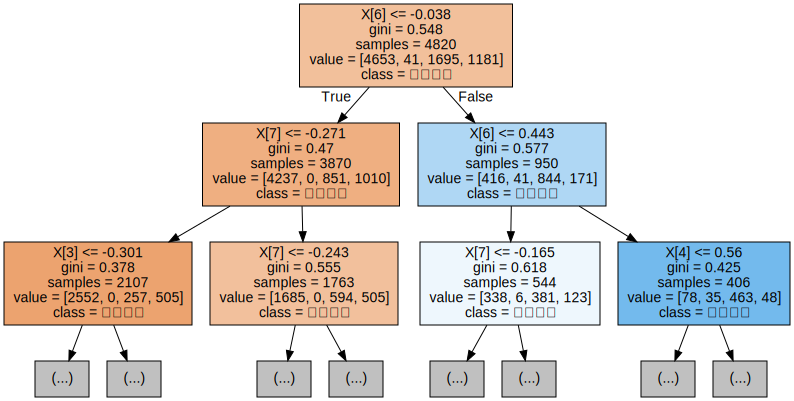

In [ ]:
#트리 시각화
from sklearn.tree import export_graphviz
model4 = RandomForestClassifier(500, max_depth=13,random_state=0).fit(xtrain, ytrain)

estimator = model4.estimators_[1]
export_graphviz(estimator, out_file="tree.dot", class_names = Y, max_depth=2,
                           feature_names = None, impurity=True, filled=True)

import graphviz
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

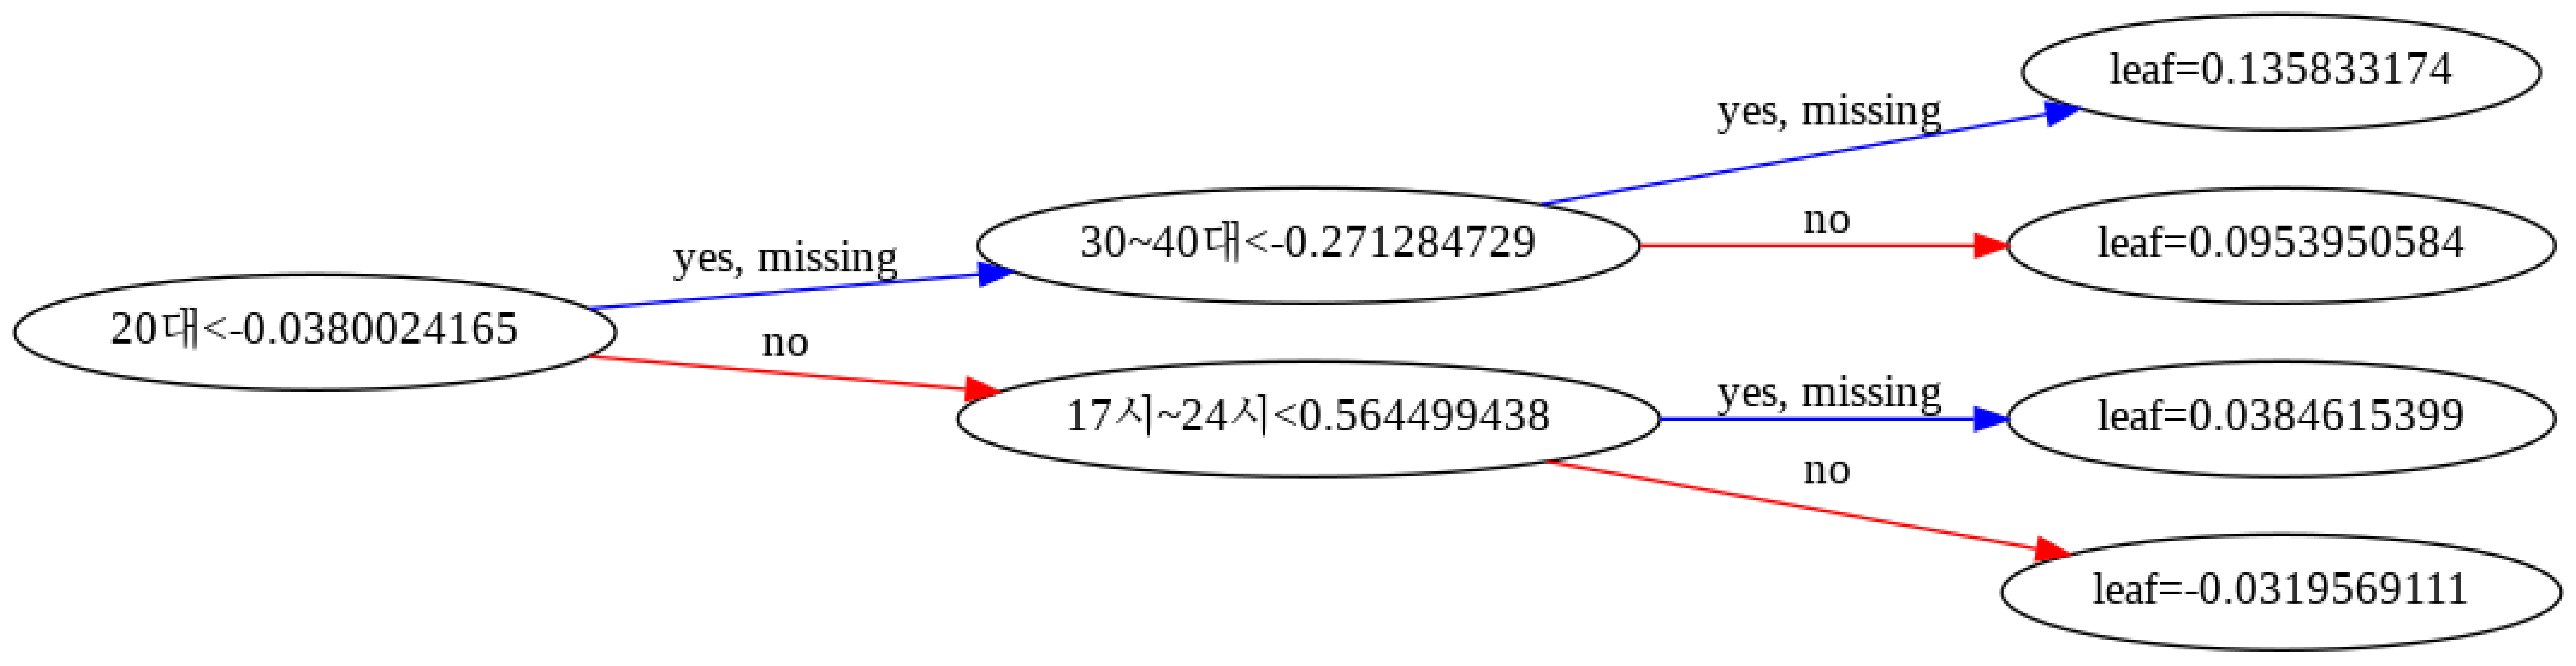

In [ ]:
import xgboost as xgb
import matplotlib.pyplot as plt
model5 =  XGBClassifier(eval_metric='logloss', use_label_encoder=False, max_depth=2).fit(xtrain, ytrain)
xgb.plot_tree(model5, num_trees=0, rankdir='LR')

fig = plt.gcf()
fig.set_size_inches(150, 100)

# 이미지 저장하고 싶다면
  # fig.savefig('tree.png')

plt.show()

In [ ]:
help(LGBMClassifier)

NameError: ignored

In [ ]:
# 트리 시각화 저장
!pip install pydotplus
import pydotplus
pydot_graph = pydotplus.graph_from_dot_data(dot_graph)
pydot_graph.set_size('"10,9!"')
pydot_graph.write_png('resized_tree.png')
gvz_graph = graphviz.Source(pydot_graph.to_string())
gvz_graph

   feature  importance
0       요일    0.141616
1       성별    0.074423
2   0시~11시    0.083403
3  11시~17시    0.083397
4  17시~24시    0.092112
5      10대    0.079664
6      20대    0.175895
7   30~40대    0.101220
8      50대    0.078907
9    60대이상    0.089361


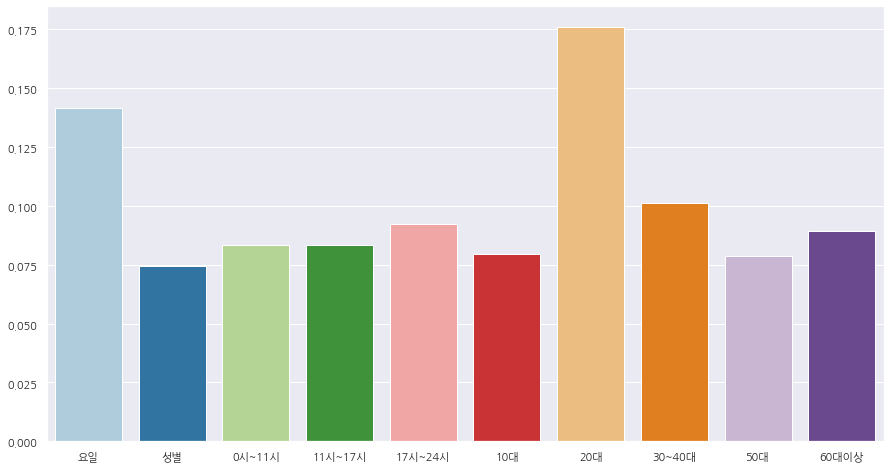

In [ ]:
# 피처별 중요도 값 확인하고 막대 그래프로 표현

import seaborn as sns
import numpy as np
%matplotlib inline
model5 =  XGBClassifier(eval_metric='logloss', use_label_encoder=False, max_depth=13).fit(xtrain, ytrain)
importV = pd.DataFrame({'feature' : xtrain.columns,
                    'importance' : model5.feature_importances_})
print(importV)
# feature importance를 column 별로 시각화 하기
plt.rcParams['font.family'] = 'NanumGothic'
plt.figure(figsize = (15,8))
sns.set_palette("Paired")
sns.barplot(x=xtrain.columns , y=model5.feature_importances_)

# # 결과
# # petal length의 피처 중요도가 가장 높음

   feature  importance
0       요일         223
1       성별         125
2   0시~11시        1421
3  11시~17시        1232
4  17시~24시        1121
5      10대        1214
6      20대        1248
7   30~40대        1058
8      50대        1163
9    60대이상        1407


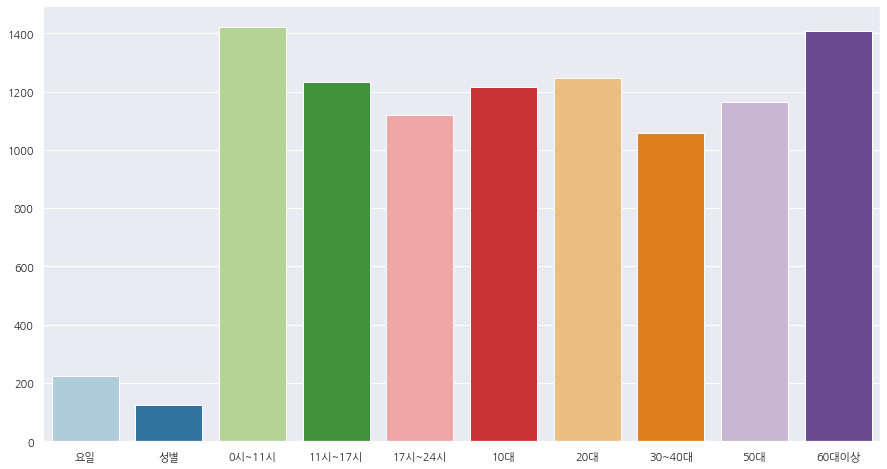

In [ ]:
# 피처별 중요도 값 확인하고 막대 그래프로 표현

import seaborn as sns
import numpy as np
%matplotlib inline

lgbm_wrapper = LGBMClassifier(n_estimators=400,max_depth=3)
model7 =  lgbm_wrapper.fit(xtrain, ytrain, eval_metric='logloss', verbose=True)

importV = pd.DataFrame({'feature' : xtrain.columns,
                    'importance' : model7.feature_importances_})
print(importV)
# feature importance를 column 별로 시각화 하기
plt.rcParams['font.family'] = 'NanumGothic'
plt.figure(figsize = (15,8))
sns.set_palette("Paired")
sns.barplot(x=xtrain.columns , y=model7.feature_importances_)

# # 결과
# # petal length의 피처 중요도가 가장 높음

In [ ]:
importV = pd.DataFrame({'feature' : xtrain.columns,
                    'importance' : model7.feature_importances_})
importV

,feature,importance
0,요일,223
1,성별,125
2,0시~11시,1421
3,11시~17시,1232
4,17시~24시,1121
5,10대,1214
6,20대,1248
7,30~40대,1058
8,50대,1163
9,60대이상,1407
